#                                                           Revamping discount strategy for AWS Marketing Suite Product 
Josephine Gunawan - DTIDSOL-02

## Background and aim

Amazon Web Services (AWS) is a well-known SaaS company that sells software for sales and marketing to other companies (B2B). The product is a cloud computing platform powered by Amazon, which provides an end-to-end service for business users to build and run applications efficiently.
 
AWS is accessible over the internet and can be reached by anyone worldwide. To date, the company has sold 14 types of products to 42 countries and engaged 99 customers from various industries and segments, including Small and Medium-Size Business (SMB), Strategic, and Enterprise. This market dominance is predicted to be around 30% of the global cloud infrastructure, making AWS a mature cloud computing platform. 


The data set provided by the company describes order details from January 2020 to December 2023. It contains market distribution and segmentation, sales performance, quantity, profit, and discount for each customer transaction. As a data analyst, we have performed and analyzed: 

(1) Data preprocessing 

(2) AWS's sales performance : (a) identify sales trend, profit, and discount overtime; (b) identify the association between profit and discount, which results in a negative relationship; (c) focus the analyses on a product that has a negative profit

(3) AWS's market distribution: including sales performance from each region, subregion, country, and city

(4) AWS's customer segmentation: based on the purchasing recency, frequency, and monetary

The company wants to understand factors that affect the negative profit of a product; **thus we aim to analyze what factors contribute towards negative profitability in the AWS SaaS product. Subsequently, we will provide recommendations based on the findings.**


## Data Column Description


| **Columns Name** | **Column Description**                                   |
| ---------------- | -------------------------------------------------------- |
| **Row ID**       | A unique identifier for each transaction.                |
| **Order ID**     | A unique identifier for each order.                      |
| **Order Date**   | The date when the order was placed.                      |
| **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
| **Contact Name** | The name of the person who placed the order.             |
| **Country**      | The country where the order was placed.                  |
| **City**         | The city where the order was placed.                     |
| **Region**       | The region where the order was placed.                   |
| **Subregion**    | The subregion where the order was placed.                |
| **Customer**     | The name of the company that placed the order.           |
| **Customer ID**  | A unique identifier for each customer.                   |
| **Industry**     | The industry the customer belongs to.                    |
| **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
| **Product**      | The product was ordered.                                 |
| **License**      | The license key for the product                          |
| **Sales**        | The total sales amount for the transaction.              |
| **Quantity**     | The total number of items in the transaction             |
| **Discount**     | The discount applied to the transaction.                 |
| **Profit**       | The profit from the transaction.                         |

## Import Libraries

In [67]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

## 1. Load Dataset

In [3]:
df = pd.read_csv('Saas-Sales.csv')
display(df.head(), df.tail())


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## 2. Data Preprocessing

**2.1 Data Cleaning and Understanding**

In [4]:
a,b = df.shape
print(f'In this dataset there is {a} rows and {b} columns')

In this dataset there is 9994 rows and 19 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Drop and Change data type

1. Drop "Date Key" due to redundancy. The "Date Key" implies the same concept as "Order Date"
2. Keep the "Order date" and change the data type as dates using parse_dates. This allows easier data manipulation and visualisation.
3. Convert "customer ID" to string, to prevent alphanumeric operation

In [6]:
df = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'], dtype= {'Customer ID': str})   
df = df.drop(columns=['Date Key'])

display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


**2.2 Identify unique value**

In [7]:
# Check Unique Values exist in dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_values(df):
    
    uniquedata = pd.DataFrame()
    uniquedata ['Columns'] = df.columns
    uniquedata ['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    uniquedata ['Unique'] = [df[col].unique() for col in (df.columns)] 
    return uniquedata

unique_values(df)

,Columns,Unique Count,Unique
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00

**In general, the dataset :**
* has 19 coloumns and 9994 rows
* There is no `Nan` identified
* At a glance, there is no typo at `Country`,`City`,`Region`,`Subregion`,`Customer`,`Customer ID`,`Industry`,`Segment`,`Product` coloumns
* The coloumn `Discount` shows a range of discount from 0.0 to 0.8 
* There are negative profit numbers identified at the `Profit` coloumn

**Insight from Unique Values at Each Columns**

**1. Order ID:** There are 5009 unique order ID. The ID has region-year-number which the product has been bought.

**2. Order Date:** There are 1237 unique order dates, indicating that the dataset spans a range of 2020-01-03 to 2023-12-31

**3. Contact Name:** There are 793 unique contact names

**4. Country, City, Region & Subregion:** There are 48 unique countries, 262 unique cities, 3 unique regions [EMEA, AMER, APJ] and 12 subregions, that represent the widely spread market sales and geographical area

**5. Customer & Customer ID:** There are 99 unique ID for customers

**7. Industry & Segment:** There are 10 industries and 3 business segmentation where the company sold its products

**8. Product & License:** There are 14 products and 9994 unique license codes that are differs between each other.

**9. Sales, Quantity, Discount, Profit:** The sales display sales revenue, follow by quantity of sales, discount provided, and the profit.


**2.3 Check missing value and data duplication**

2.3.1 Check missing value

In [8]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# missing value percentage in each row
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

--> There are no missing values from this data set

2.3.2 Check data duplication

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated(keep=False)]

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [12]:
df[df['Order ID'].duplicated(keep=False)].head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694


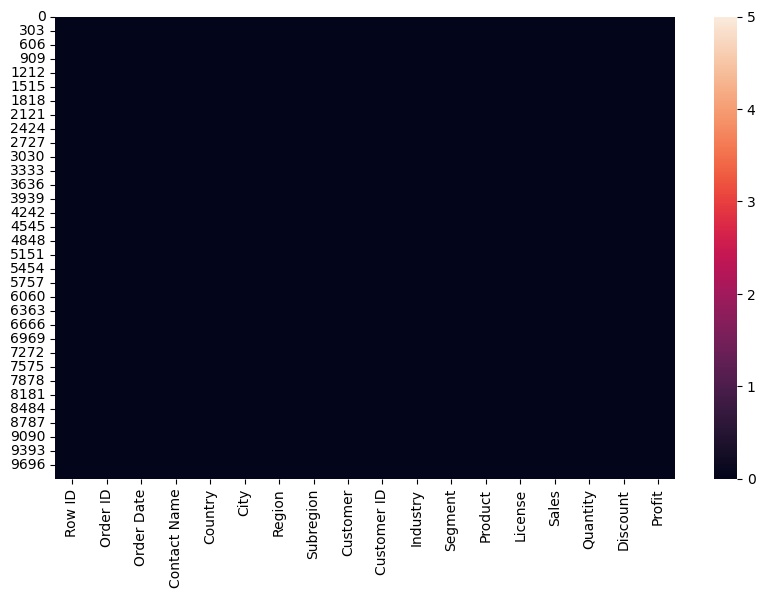

In [13]:
#Visualisation of missing value percentage in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data = df.isna(), vmin=0, vmax= 5)
plt.show()

==> There are no data duplication detected 

2.3.3 Check more than 1 spacing

In [14]:
import re 

pattern = r'\s{2}'

def many_spaces(i):
    if isinstance(i, str):
        return (re.search(pattern, i))
    return False

space_info = []
for column in df.columns:
    manywhitespaces = df[column].apply(many_spaces).any()
    space_info.append({'Column': column, 'Has >1 Whitespace': manywhitespaces})

whitespaces_df = pd.DataFrame(space_info)
whitespaces_df


,Column,Has >1 Whitespace
0,Row ID,False
1,Order ID,False
2,Order Date,False
3,Contact Name,False
4,Country,False
5,City,False
6,Region,False
7,Subregion,False
8,Customer,False
9,Customer ID,False


==> There are no text in the coloumn that has >1 whitespace

**2.4 Check outliers**

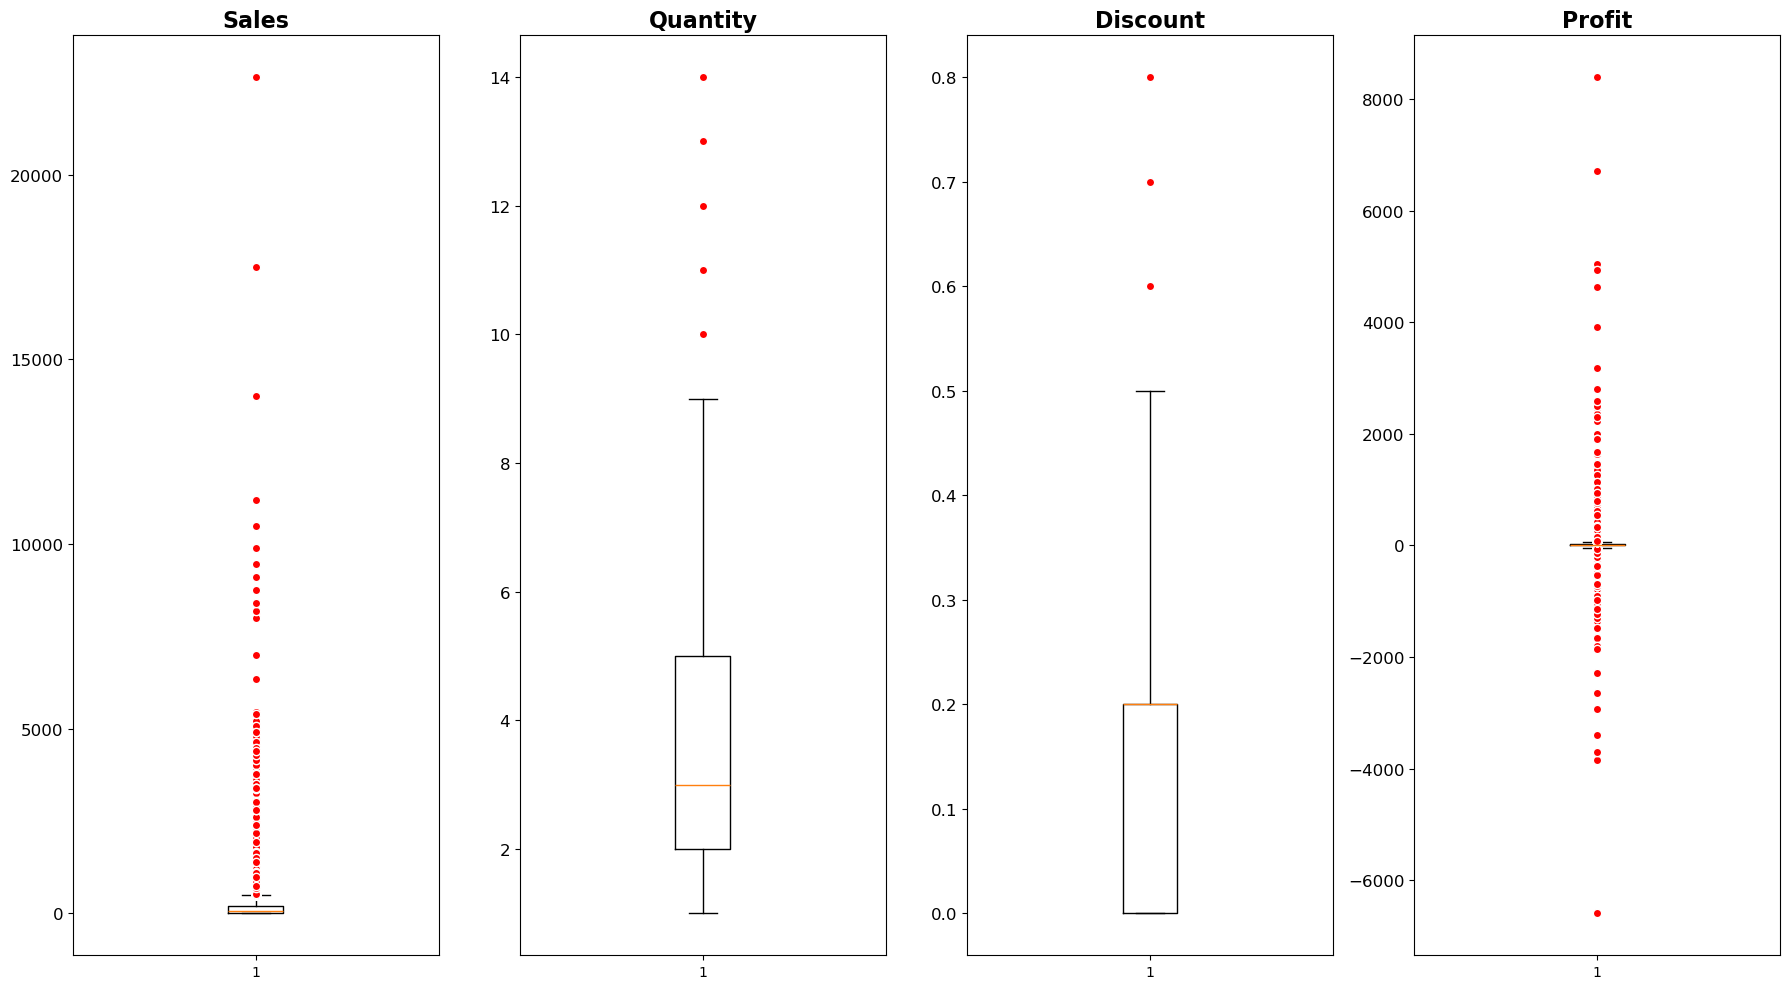

In [15]:
# Define outlier style
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# Select the columns
selected_columns = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Create subplots
fig, axs = plt.subplots(1, len(selected_columns.columns), figsize=(18, 10))

# Loop through each selected column
for i, ax in enumerate(axs.flat):
    ax.boxplot(selected_columns.iloc[:, i], flierprops=red_circle)
    ax.set_title(selected_columns.columns[i], fontsize=16, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [16]:
# Sales, quantity, discount and profit data description
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [115]:
# checking the outliers number 

# Columns to analyze
columns = ['Sales', 'Quantity','Discount','Profit']

result = []

for col in columns:
    data = df[col]
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers = data[(data < lower_fence) | (data > upper_fence)]

    result.append({
        "Column": col,
        "Q1": Q1,
        "Q2": Q2,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Fence": lower_fence,
        "Upper Fence": upper_fence,
        "Outlier Count": len(outliers),
        "Lowest Outlier": outliers.min() if not outliers.empty else None,
        "Highest Outlier": outliers.max() if not outliers.empty else None
    })

summary_df = pd.DataFrame(result)
summary_df


,Column,Q1,Q2,Q3,IQR,Lower Fence,Upper Fence,Outlier Count,Lowest Outlier,Highest Outlier
0,Sales,17.28000,54.4900,209.940,192.66000,-271.710000,498.930000,1167,499.168,22638.480
1,Quantity,2.00000,3.0000,5.000,3.00000,-2.500000,9.500000,170,10.000,14.000
2,Discount,0.00000,0.2000,0.200,0.20000,-0.300000,0.500000,856,0.600,0.800
3,Profit,1.72875,8.6665,29.364,27.63525,-39.724125,70.816875,1881,-6599.978,8399.976


From the boxplot and quantile analyses, we found outliers at Sales, Quantity, Discount and Profit, and the numbers are generally big for each coloumn. 

1. Sales:
* Lower fence : -271.71
* Upper fence : 498.93
* Number of outliers : 1167 

Sales data has a prominance number of outliers, which also displaying a negative profit. The discrepancy between the lowest and highest outliers is big, suggesting a extremely low or high sales figures. 

2. Quantity
* Lower fence : -2.5
* Upper fence : 9.5
* Number of outliers : 170
The Quantity data has the lowest outliers among the others. 

3. Discount
* Lower fence : -0.3
* Upper fence : 0.5
* Number of outliers : 856

4. Profit
* Lower fence : -39.72
* Upper fence : 70.81
* Number of outliers : 1881
Similar to sales, profit has abundance number of outliers and hugh gap between lowest and highest outlier is identified. 


**To conclude, there is an assumtion where the products are sold at such different price (too low or high) from the standar price; this also can relates with the profit.**

**Referring to the aim where we want to analyse factors that affecting the negative profit, it is not wise to delete the outliers as this might affect the analysis.**

## 3. Data Analysis

**3.1 Exploratory data analysis - Profit Margin**

At this stage, we want to understand how much profit that the company was set for its sales. 

In [17]:
df["Profit Margin"] = round((df["Profit"] / df["Sales"]) * 100, 2)

# Display the updated DataFrame
df.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Contact Name   9994 non-null   object        
 4   Country        9994 non-null   object        
 5   City           9994 non-null   object        
 6   Region         9994 non-null   object        
 7   Subregion      9994 non-null   object        
 8   Customer       9994 non-null   object        
 9   Customer ID    9994 non-null   object        
 10  Industry       9994 non-null   object        
 11  Segment        9994 non-null   object        
 12  Product        9994 non-null   object        
 13  License        9994 non-null   object        
 14  Sales          9994 non-null   float64       
 15  Quantity       9994 n

In [19]:
display(df.describe(), df.describe(include='object'))

,Row ID,Order Date,Sales,Quantity,Discount,Profit,Profit Margin
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896,12.031390
min,1.000000,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750,7.500000
50%,4997.500000,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500,27.000000
75%,7495.750000,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000,36.250000
max,9994.000000,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000,50.000000
std,2885.163629,NaN,623.245101,2.225110,0.206452,234.260108,46.675436


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


**3.2 Normal distribution assessment**

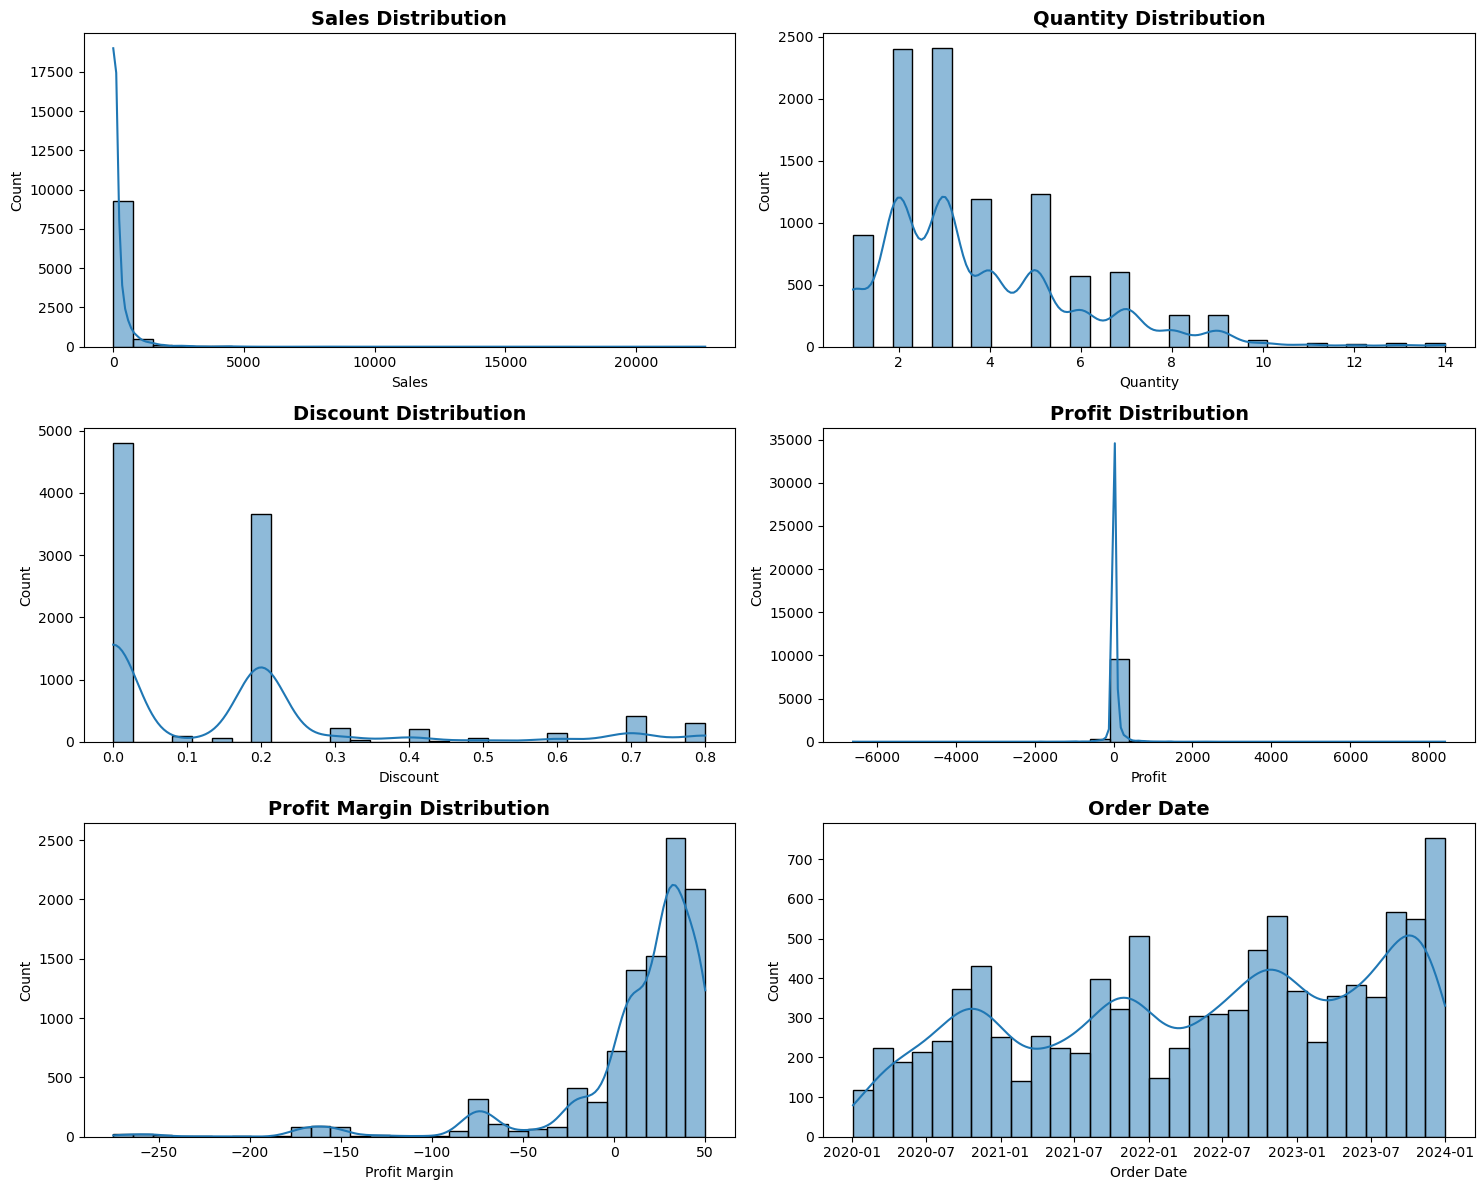

In [20]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, Profit and Profit margin

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Sales Distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Margin Distribution
sns.histplot(df['Profit Margin'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Profit Margin Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Order Date Distribution
sns.histplot(df['Order Date'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Order Date', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

In [124]:
sd_norm = kstest(df['Sales'], 'norm')
quan_norm = kstest(df['Quantity'], 'norm')
disc_norm = kstest(df['Discount'], 'norm')
profit_norm = kstest(df['Profit'], 'norm')
profitmargin_norm = kstest(df['Profit Margin'], 'norm')


print(f'Sales distribution normality test: {sd_norm}')
print(f'Quantity distribution normality test: {quan_norm}')
print(f'Discount distribution normality test: {disc_norm}')
print(f'Profit distribution normality test: {profit_norm}')
print(f'Profit margin distribution normality test: {profitmargin_norm}')

Sales distribution normality test: KstestResult(statistic=0.9820648440401365, pvalue=0.0, statistic_location=2.61, statistic_sign=-1)
Quantity distribution normality test: KstestResult(statistic=0.8872958956683907, pvalue=0.0, statistic_location=2, statistic_sign=-1)
Discount distribution normality test: KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
Profit distribution normality test: KstestResult(statistic=0.7179722426806663, pvalue=0.0, statistic_location=2.128, statistic_sign=-1)
Profit margin distribution normality test: KstestResult(statistic=0.7885240263229827, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


**Insights:**

(1) Using Kolmogorov Smirnoff, we checked the normality data distribution of Sales, Quantity, Discount, Profit and Profit Margin. **The results show that the p-value for each category is 0.0, which is < 0.05, hence the data is not normality distributed. This also can be seen from the visualisation above.**

(2) Based on the order data, the trend of total order increases every year, with a pattern of higher sales always be found at the end of each year.

**3.3 General sales trend and performance**

**3.3.1 Identify the sales performance of Countries (accumulative all products)**

* Top 5 total sales by countries : United States, United Kingdom, Japan, Canada, France
* Bottom 5 total sales by countries : Slovenia, Croatia, Denmark, Iceland, Qatar

In [38]:
#total sales by country - df
df_plotsales = df.groupby(['Country'])['Sales'].sum().sort_values(ascending=False).reset_index()
display(df_plotsales.head(), df_plotsales.tail())

,Country,Sales
0,United States,457687.6315
1,United Kingdom,313169.8810
2,Japan,170188.0458
3,Canada,138641.2700
4,France,116511.9140


,Country,Sales
43,Slovenia,1603.136
44,Croatia,1315.560
45,Denmark,1270.530
46,Iceland,1209.824
47,Qatar,919.910


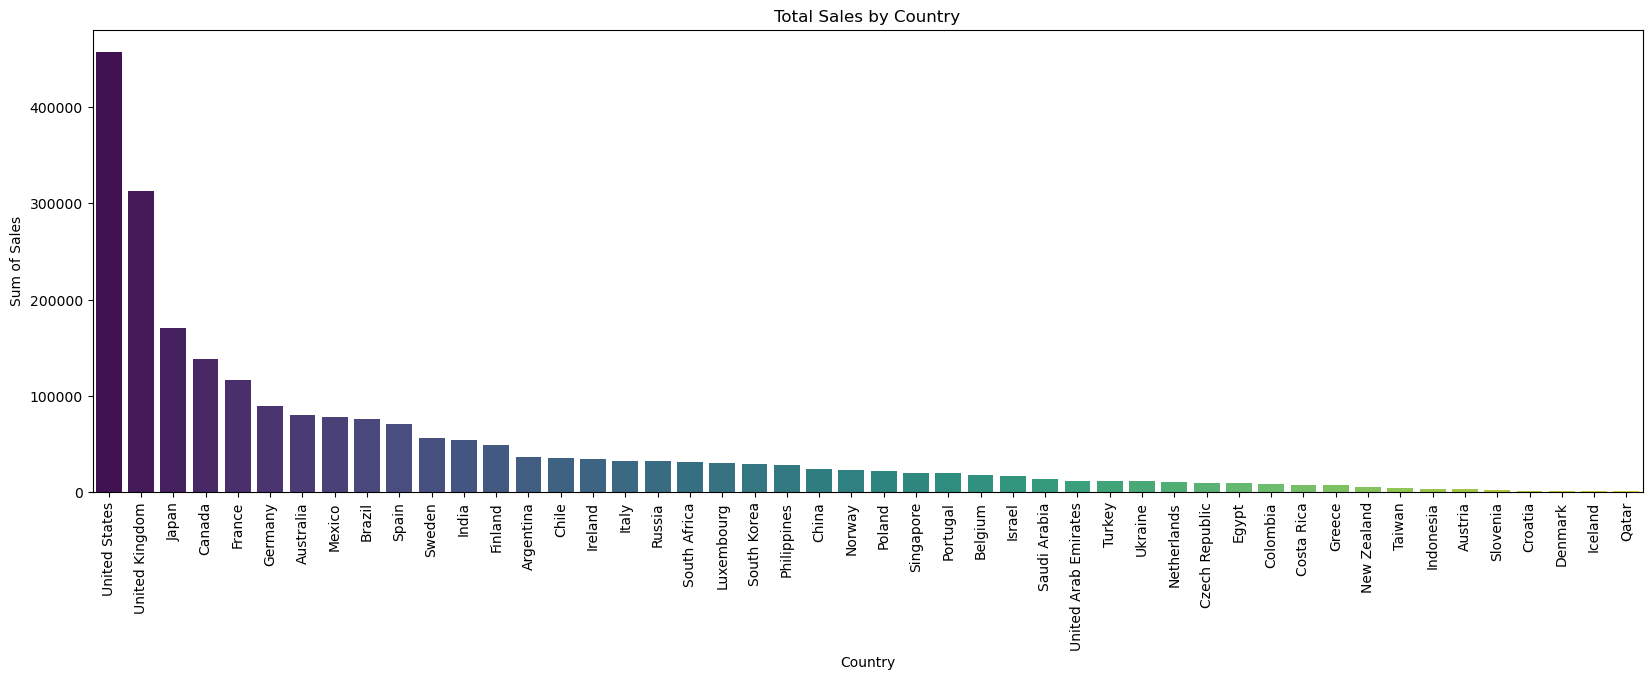

In [39]:
#total sales by country
plt.figure(figsize=(20,6))
sns.barplot(x='Country', y='Sales', data=df_plotsales, palette='viridis')

plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sum of Sales')
plt.xticks(rotation=90)
plt.show()

**3.3.2 Identify orders with negative profit**

Next, we want to count how many orders with negative profit (all products)

In [40]:

neg_profit = (df['Profit']<0).sum()
all_orders = 9994
percentage_negprofit = (neg_profit / all_orders)*100

#1871 out of 9994 orders have negative profits
print(f"Orders with negative profit: {neg_profit}")
print(f"Total Orders: {all_orders}")
print(f"Percentage of negative profit: {percentage_negprofit:.2f}%")

Orders with negative profit: 1871
Total Orders: 9994
Percentage of negative profit: 18.72%


In [41]:
# which product has the most negative value

df['Neg_profit'] = df['Profit'] < 0
neg_profit_df = df[df['Neg_profit']]

product_loss_counts = neg_profit_df['Product'].value_counts().head(10)
print(product_loss_counts)

Product
ContactMatcher            816
FinanceHub                235
SaaS Connector Pack       167
Marketing Suite - Gold    161
Site Analytics            136
Marketing Suite           109
Data Smasher               91
OneView                    67
Big Ol Database            44
Support                    33
Name: count, dtype: int64


Above are the listed product that pottentialy give negative profit

In [42]:
# which segment give negative value
industry_loss = neg_profit_df['Industry'].value_counts().head(10)
print(industry_loss)

Industry
Finance              390
Energy               247
Manufacturing        231
Tech                 225
Consumer Products    217
Healthcare           195
Retail               160
Communications       124
Transportation        65
Misc                  17
Name: count, dtype: int64


* Finance, Energy, Manufacturing, Tech and Consumer Products are the top 5 products that have negative profit

In [43]:
#which country / region give the negative value
region_loss_counts = neg_profit_df['Region'].value_counts()
top_regions = region_loss_counts.head(3)
print(top_regions)

Region
APJ     751
EMEA    702
AMER    418
Name: count, dtype: int64


* The greatest number of negative profit is found at APJ region, followed by EMEA and AMER

In [44]:
#which country / region give the negative value
country_loss = neg_profit_df['Country'].value_counts()
top_loss_country = country_loss.head(5)
print(top_loss_country)

Country
Japan        486
France       278
Australia    255
Mexico       209
Germany      126
Name: count, dtype: int64


* The highest number of negative profit is found at Japan, followed by France, Australia, Mexico and Germany

Counting the number of negative profit for all orders and different category based on region, country, products and industry has given us a visualisation that there are substansial amount of negative profit in this order (18.7%). Based on this counting then we shall continue to analyse the sales and profit of the products affected. 

**3.3.2 Investigate total sales and profit by products (all countries)**

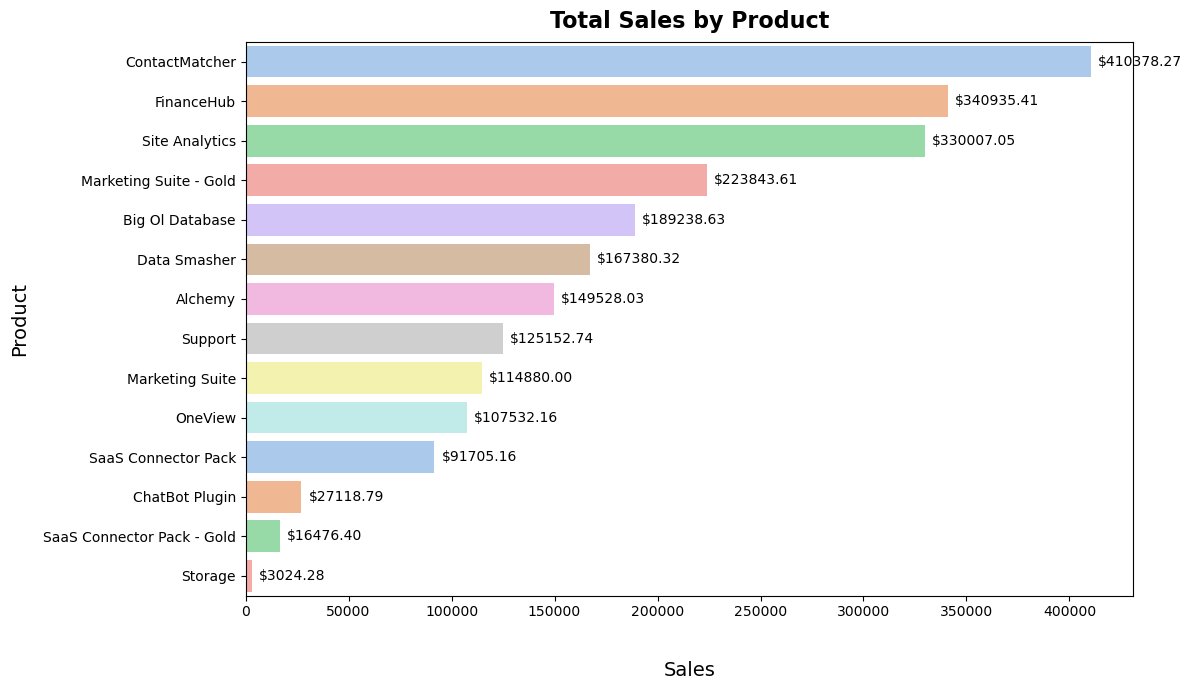

In [45]:
# sales by product (all countries)
plt.figure(figsize=(12, 7))

sales_byproduct = df.groupby("Product")[["Sales"]].sum().sort_values("Sales", ascending=False).reset_index()
ax = sns.barplot(
    data=sales_byproduct,
    y="Product",
    x="Sales",
    palette="pastel",  
    estimator="sum")
    
for container in ax.containers:
    ax.bar_label(container, fmt='${:.2f}', padding=5, fontsize=10, color='black', label_type='edge')


plt.title("Total Sales by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Sales", size=14, labelpad=30)
plt.ylabel("Product", size=14, labelpad=10)
plt.tight_layout()
plt.show()


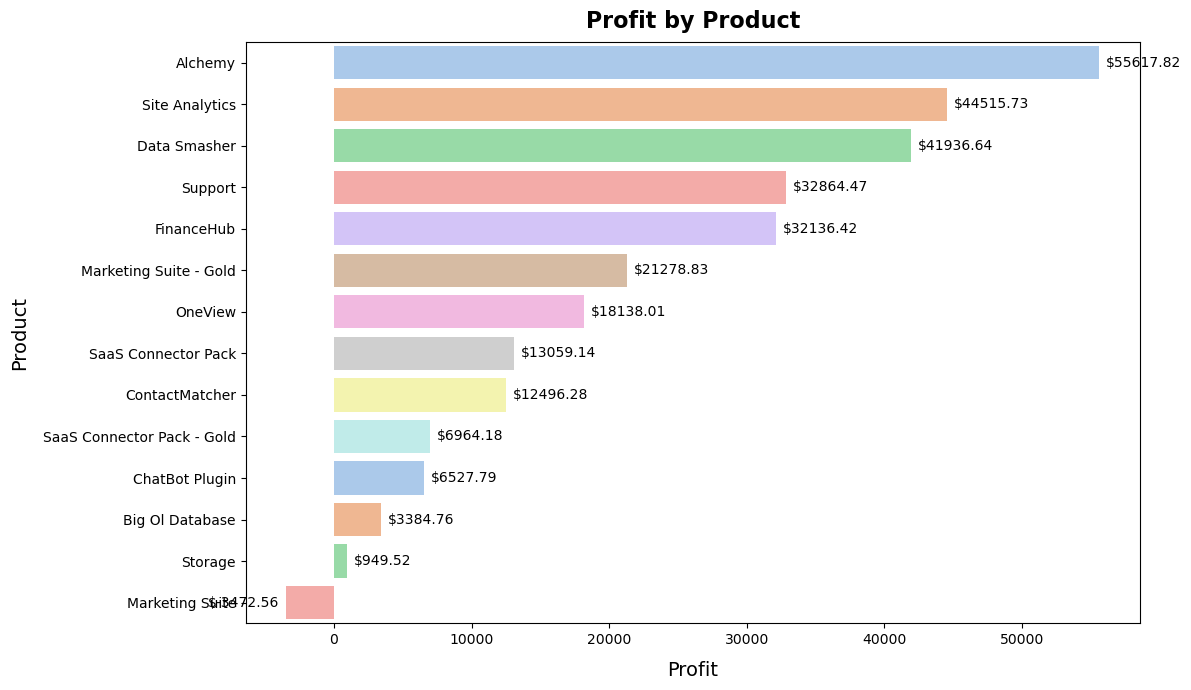

In [201]:
# profit by product (all countries)
plt.figure(figsize=(12, 7))

profit_byproduct = df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).reset_index()

ax = sns.barplot(
    data=profit_byproduct,
    y="Product",
    x="Profit",
    ci=None,
    palette="pastel",  
    estimator="sum")

for container in ax.containers:
    ax.bar_label(container, fmt='${:.2f}', padding=5, fontsize=10, color='black', label_type='edge')

plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.tight_layout()
plt.show()



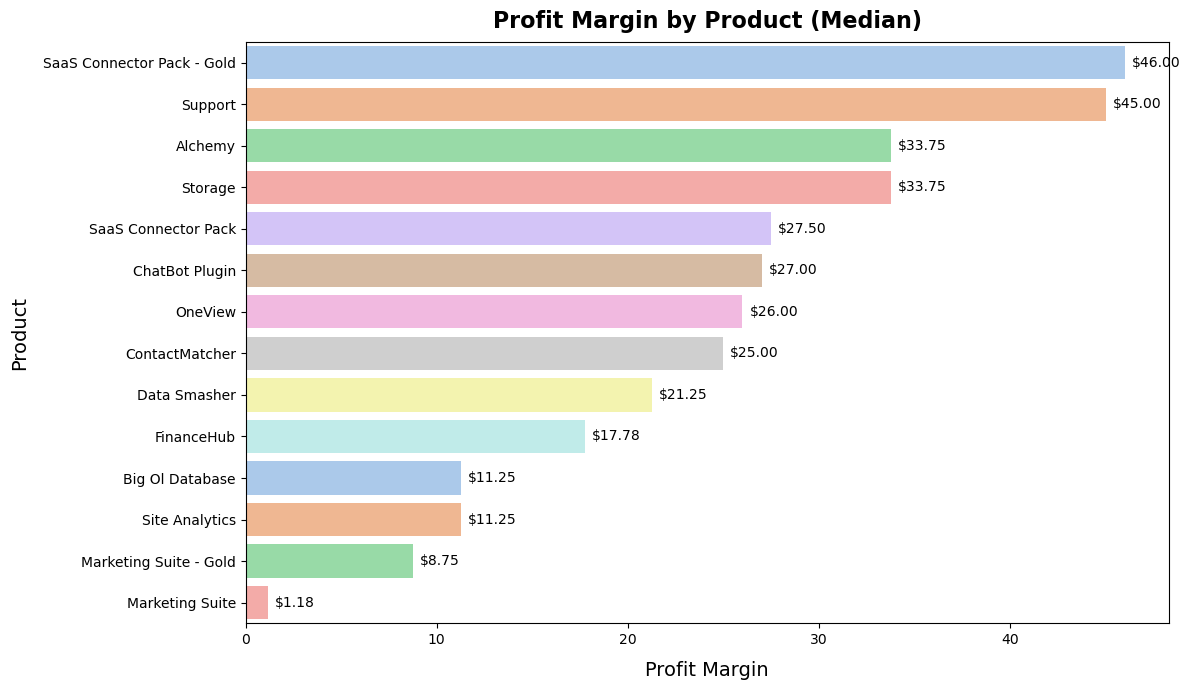

In [47]:
# profit margin by product (all countries)
plt.figure(figsize=(12, 7))

profitmargin_byproduct = df.groupby("Product")[["Profit Margin"]].median().sort_values("Profit Margin", ascending=False).reset_index()

ax = sns.barplot(
    data=profitmargin_byproduct,
    y="Product",
    x="Profit Margin",
    ci=None,
    palette="pastel", 
    estimator="median")

for container in ax.containers:
    ax.bar_label(container, fmt='${:.2f}', padding=5, fontsize=10, color='black', label_type='edge')


plt.title("Profit Margin by Product (Median)", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit Margin", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.tight_layout()
plt.show()


The barcharts has visualised the number of total sales, total profit,  median profit margin and median discount by products. 

1. Total sales: 
    * The top 3 performance of sales goes to Contact Matcher, FinanceHub and Site Analytics; mean while Chatbot Plugin, SaaS connector pack gold and Storage are the 3 bottom

2. Total Profit: 
    * Positive Profit : The top 3 profitable products are Alchemy, Site Analytics, and Data Smasher
    * Negative Profit : Marketing Suite is identified as the only product that has a negative profit

3. Profit margin:
    * The highest profit margin is found at SaaS Connector Pack-Gold
    * The lowest profit margin is found at the Marketing Suite 

This initial analysis provides insight that :
* Products like Alchemy, Site Analytics and Data Smasher have generated substansial profit for the company. In contrast, **the Marketing Suite product is performing poorly, resulting in a negative proft, which requires in-depth analysis.**


# 4. Data Analysis - Investigate the negative profit of "Marketing Suite" 


**4.1 Grouping the data only for Marketing Suite**

In [48]:
df_ms = df[df["Product"] == "Marketing Suite"]

# Display the updated DataFrame
df_ms.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Neg_profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,False
27,28,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,True
38,39,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,True
189,190,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,False
192,193,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,False


In [49]:
display(df_ms.describe(),(df_ms.describe(include='object')))


,Row ID,Order Date,Sales,Quantity,Discount,Profit,Profit Margin
count,228.000000,228,228.000000,228.000000,228.000000,228.000000,228.000000
mean,5072.521930,2022-05-04 01:34:44.210526208,503.859633,3.807018,0.211140,-15.230509,-12.663904
min,1.000000,2020-01-14 00:00:00,35.490000,1.000000,0.000000,-1665.052200,-210.000000
25%,2639.250000,2021-08-03 00:00:00,190.500000,2.000000,0.000000,-42.631200,-13.885000
50%,5121.000000,2022-06-16 12:00:00,306.820250,3.000000,0.200000,4.133300,1.180000
75%,7544.500000,2023-05-03 00:00:00,522.285000,5.000000,0.320000,40.054100,12.500000
max,9963.000000,2023-12-31 00:00:00,4404.900000,13.000000,0.700000,1013.127000,29.000000
std,2848.103187,NaN,638.748523,2.283352,0.191913,182.034224,46.947295


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,228,228,228,228,228,228,228,228,228,228,228,228
unique,224,195,33,100,3,11,89,89,10,3,1,228
top,EMEA-2021-102281,Sue Anderson,United States,London,EMEA,NAMER,BNP Paribas,1065,Finance,SMB,Marketing Suite,16GRM07R1K
freq,2,4,52,29,98,62,7,7,56,131,228,1


As an overview, from 9994 of total orders, Marketing Suite has contributed 228 orders, with highest market penetration in EMEA for region, United States for the country, Finance Industry, SMB segment, and BNP Paribas as the highly recurring customer

**4.2 Sales per month**

In [50]:
df_ms = df_ms.copy()

# Convert 'Order Date' to datetime if it's not already in datetime format
df_ms['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting month and year
df_ms['Order Month'] = df_ms['Order Date'].dt.to_period('M')
df_ms['Order Year'] = df_ms['Order Date'].dt.to_period('Y')

# Displaying the updated DataFrame
df_ms.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Neg_profit,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,False,2022-11,2022
27,28,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,True,2021-09,2021
38,39,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,True,2021-12,2021
189,190,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,False,2021-10,2021
192,193,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,False,2021-10,2021


In [51]:
df_ms_sales = df_ms.groupby('Order Month')[["Sales"]].median().reset_index()
df_ms_sales['Sales'] = df_ms_sales['Sales'].map('${:,.2f}'.format)

df_ms_sales.head()


,Order Month,Sales
0,2020-01,$161.72
1,2020-02,$290.67
2,2020-03,$302.45
3,2020-04,$308.50
4,2020-05,$320.32


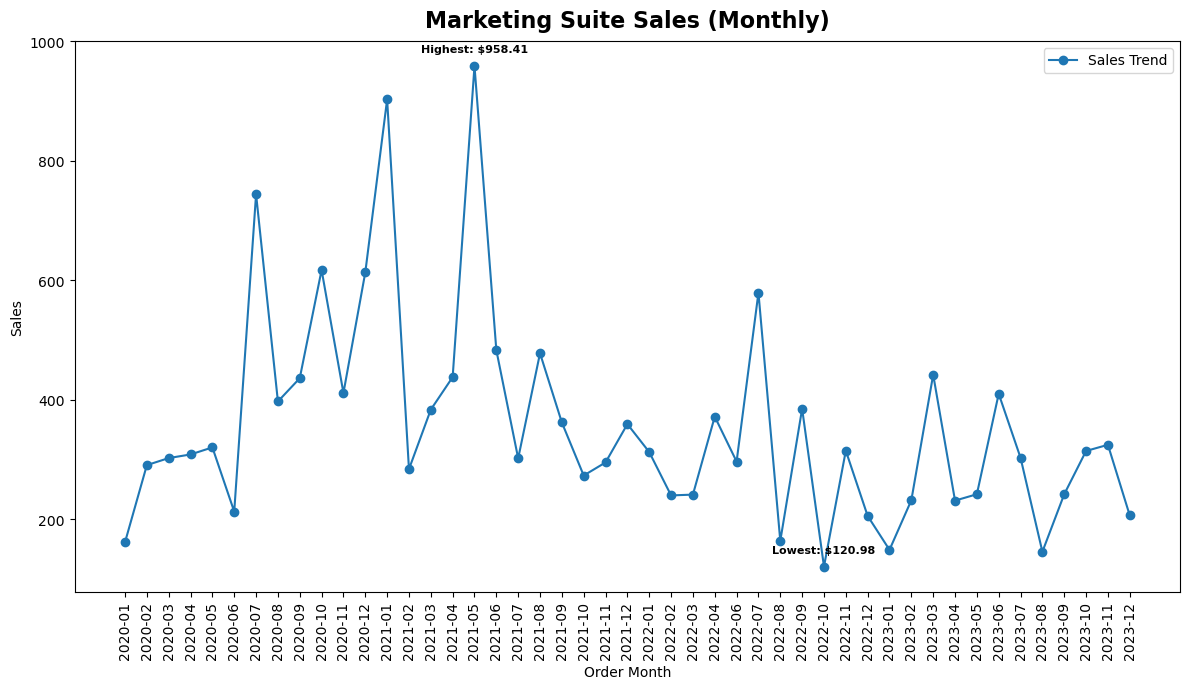

In [52]:
plt.figure(figsize=(12, 7))
sales_values = df_ms_sales['Sales'].str.replace('$', '').astype(float)
plt.plot(df_ms_sales['Order Month'].astype(str), sales_values, marker='o', linestyle='-', label='Sales Trend')

# Finding the index of the highest and lowest values
max_index = sales_values.idxmax()
min_index = sales_values.idxmin()

# Annotating the highest and lowest values with a cleaner format
plt.annotate(f"Highest: {df_ms_sales['Sales'][max_index]}", 
             (df_ms_sales['Order Month'].astype(str)[max_index], sales_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_ms_sales['Sales'][min_index]}", 
             (df_ms_sales['Order Month'].astype(str)[min_index], sales_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Marketing Suite Sales (Monthly)', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

**Insight**

From 2020 to 2023, the sales trend is flunctuated and tend to slightly decline over time. Marketing suite has good sales performance until mid of 2021, which reach its highest sales at $958.41 in May 2021 , before declining to $120.98 in October 2022. The last trend over 2023 shows a stable but flunctuated sales. 


**4.3 Monthly Profit**

In [53]:
df_monthly_profit = df_ms.groupby("Order Month")[["Profit"]].median().reset_index()
df_monthly_profit['Profit'] = df_monthly_profit['Profit'].map('${:,.2f}'.format)

df_monthly_profit.head()

,Order Month,Profit
0,2020-01,$-24.68
1,2020-02,$3.42
2,2020-03,$-12.10
3,2020-04,$-18.15
4,2020-05,$-94.81


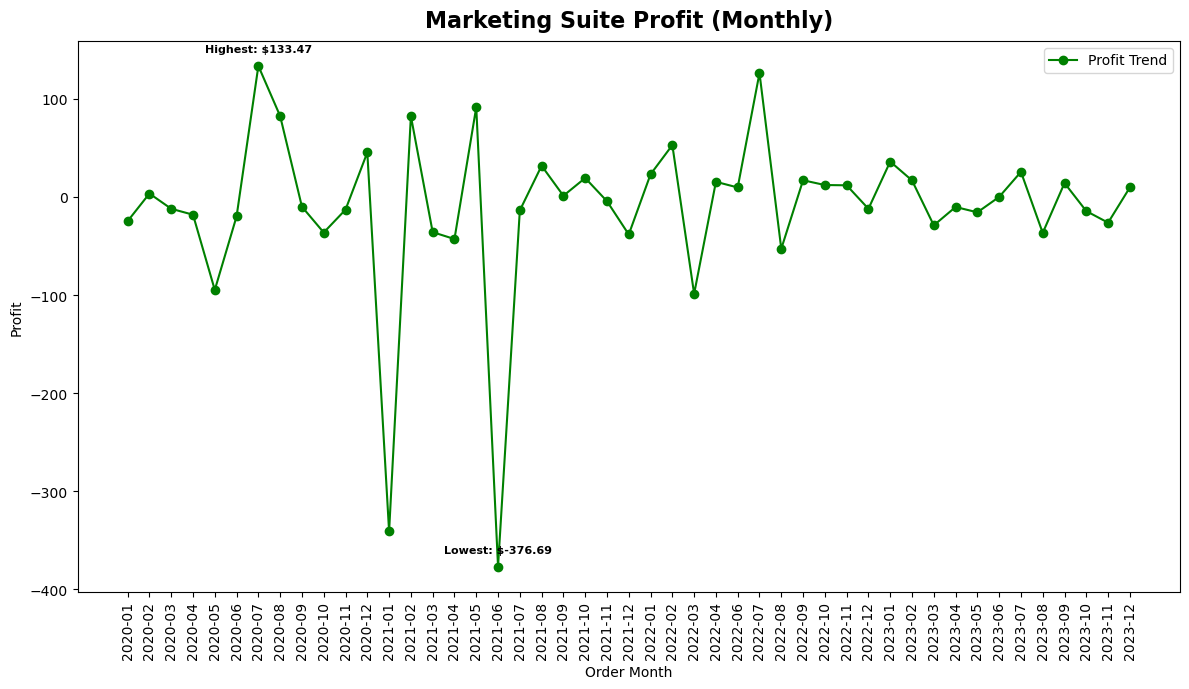

In [225]:
plt.figure(figsize=(12, 7))
monthlyprofit_values = df_monthly_profit['Profit'].str.replace('$', '').astype(float)
plt.plot(df_monthly_profit['Order Month'].astype(str), monthlyprofit_values, marker='o', linestyle='-', color='green',label='Profit Trend')

# Finding the index of the highest and lowest values
max_index_p = monthlyprofit_values.idxmax()
min_index_p = monthlyprofit_values.idxmin()

# highest and lowest values
plt.annotate(f"Highest: {df_monthly_profit['Profit'][max_index_p]}", 
             (df_monthly_profit['Order Month'].astype(str)[max_index_p], monthlyprofit_values[max_index_p]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_monthly_profit['Profit'][min_index_p]}", 
             (df_monthly_profit['Order Month'].astype(str)[min_index_p], monthlyprofit_values[min_index_p]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Marketing Suite Profit (Monthly)', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

The profit of Marketing Suite from 2020 to 2023 is generally flunctuated. The highest profit was detected at 133.47 in July 2020, meanwhile the lowest profit was detected at $-376.69 in June 2021. The recent trend of months in 2023 seems to be relatively stable, with profit ranging from $-50 to $50. 

**4.4 Monthly Profit Margin**

In [54]:
df_monthly_profitmargin = df_ms.groupby("Order Month")[["Profit Margin"]].median().reset_index()
df_monthly_profitmargin['Profit Margin'] = df_monthly_profitmargin['Profit Margin'].apply(lambda x: f"{x:.2f}%")

df_monthly_profitmargin.head()

,Order Month,Profit Margin
0,2020-01,-42.41%
1,2020-02,1.18%
2,2020-03,-5.88%
3,2020-04,-5.88%
4,2020-05,-26.30%


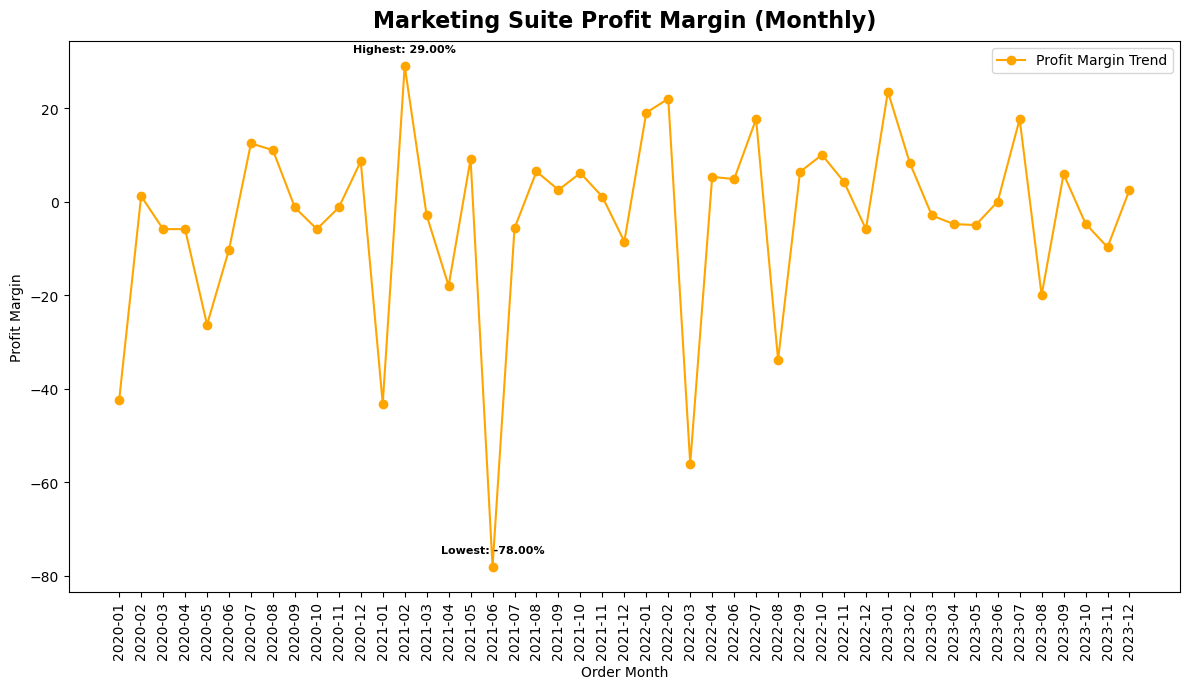

In [55]:
plt.figure(figsize=(12, 7))
monthlyprofitmargin_values = df_monthly_profitmargin['Profit Margin'].str.rstrip('%').astype(float)
plt.plot(df_monthly_profitmargin['Order Month'].astype(str), monthlyprofitmargin_values, marker='o', linestyle='-', color='orange', label='Profit Margin Trend')

# Finding the index of the highest and lowest values
max_index_pm = monthlyprofitmargin_values.idxmax()
min_index_pm = monthlyprofitmargin_values.idxmin()

# highest and lowest values
plt.annotate(f"Highest: {df_monthly_profitmargin['Profit Margin'][max_index_pm]}", 
             (df_monthly_profitmargin['Order Month'].astype(str)[max_index_pm], monthlyprofitmargin_values[max_index_pm]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_monthly_profitmargin['Profit Margin'][min_index_pm]}", 
             (df_monthly_profitmargin['Order Month'].astype(str)[min_index_pm], monthlyprofitmargin_values[min_index_pm]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')


plt.xlabel('Order Month')
plt.ylabel('Profit Margin')
plt.title('Marketing Suite Profit Margin (Monthly)', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

The profit margin showed is very flunctuated similar to the profit. The highest percentage at 29% in February 2021 and the lowest at -78% in June 2021. 

**4.5 Monthly Discount**

In [56]:
df_monthly_discount = df_ms.groupby("Order Month")[["Discount"]].median().reset_index()
df_monthly_discount['Discount'] = (df_monthly_discount['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_monthly_discount.head()

,Order Month,Discount
0,2020-01,32.50%
1,2020-02,15.00%
2,2020-03,15.00%
3,2020-04,15.00%
4,2020-05,32.50%


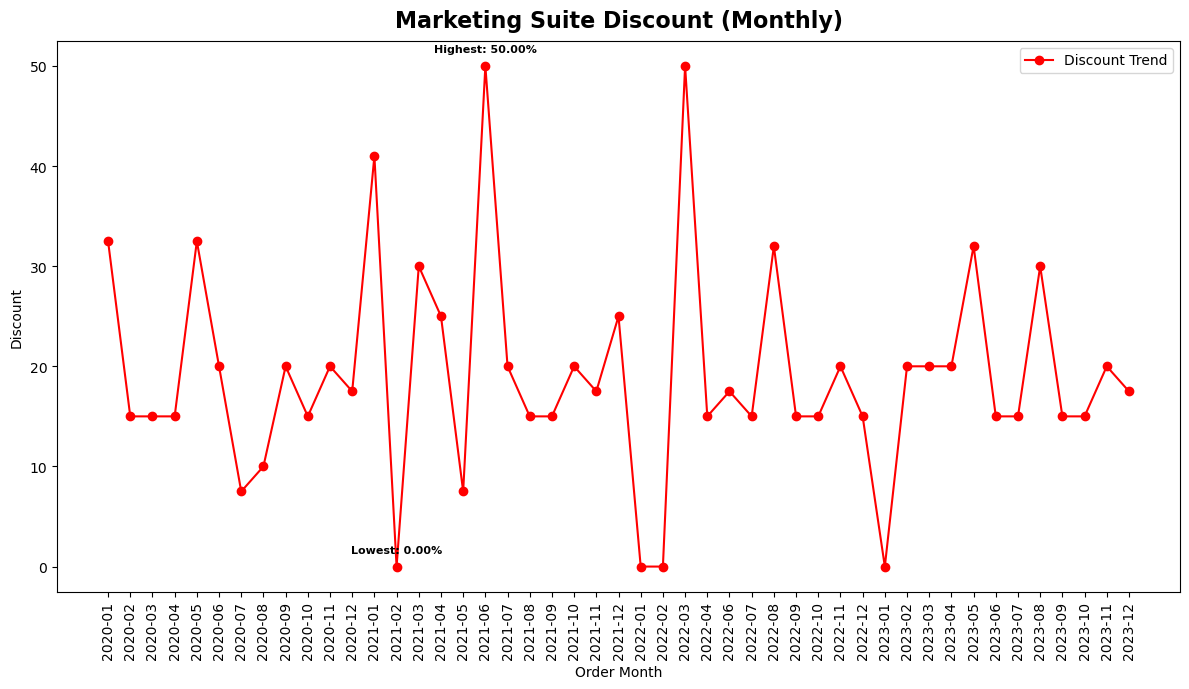

In [228]:
plt.figure(figsize=(12, 7))
monthlydiscount_values = df_monthly_discount['Discount'].str.rstrip('%').astype(float)
plt.plot(df_monthly_discount['Order Month'].astype(str), monthlydiscount_values, marker='o', linestyle='-', color='red', label='Discount Trend')

# Finding the index of the highest and lowest values
max_index_d = monthlydiscount_values.idxmax()
min_index_d = monthlydiscount_values.idxmin()

# highest and lowest values
plt.annotate(f"Highest: {df_monthly_discount['Discount'][max_index_d]}", 
             (df_monthly_discount['Order Month'].astype(str)[max_index_d], monthlydiscount_values[max_index_d]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_monthly_discount['Discount'][min_index_d]}", 
             (df_monthly_discount['Order Month'].astype(str)[min_index_d], monthlydiscount_values[min_index_d]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Marketing Suite Discount (Monthly)', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

In general, the company had always given discount to the customer for selling purpose, but we found severals month with almost 0% of discount. The lowest discount was 0% in February 2022 and the highest was 50% in June 2021. The recent trend since 2023 has shown that the discount was given between 15% to 30%. 

**Key insight:**

At a glance, we are assuming that there is a relationship between profit and discount. The assumption is the higher the discount than the profit will be less. It is based on the data above at June 2021 where the discount was at 50% then the profit dropped to $-376 and the profit margin dropped to 78%. Subsequently, we need to prove this assumption with correlation. 

**4.6 Impact of discount in profitability**

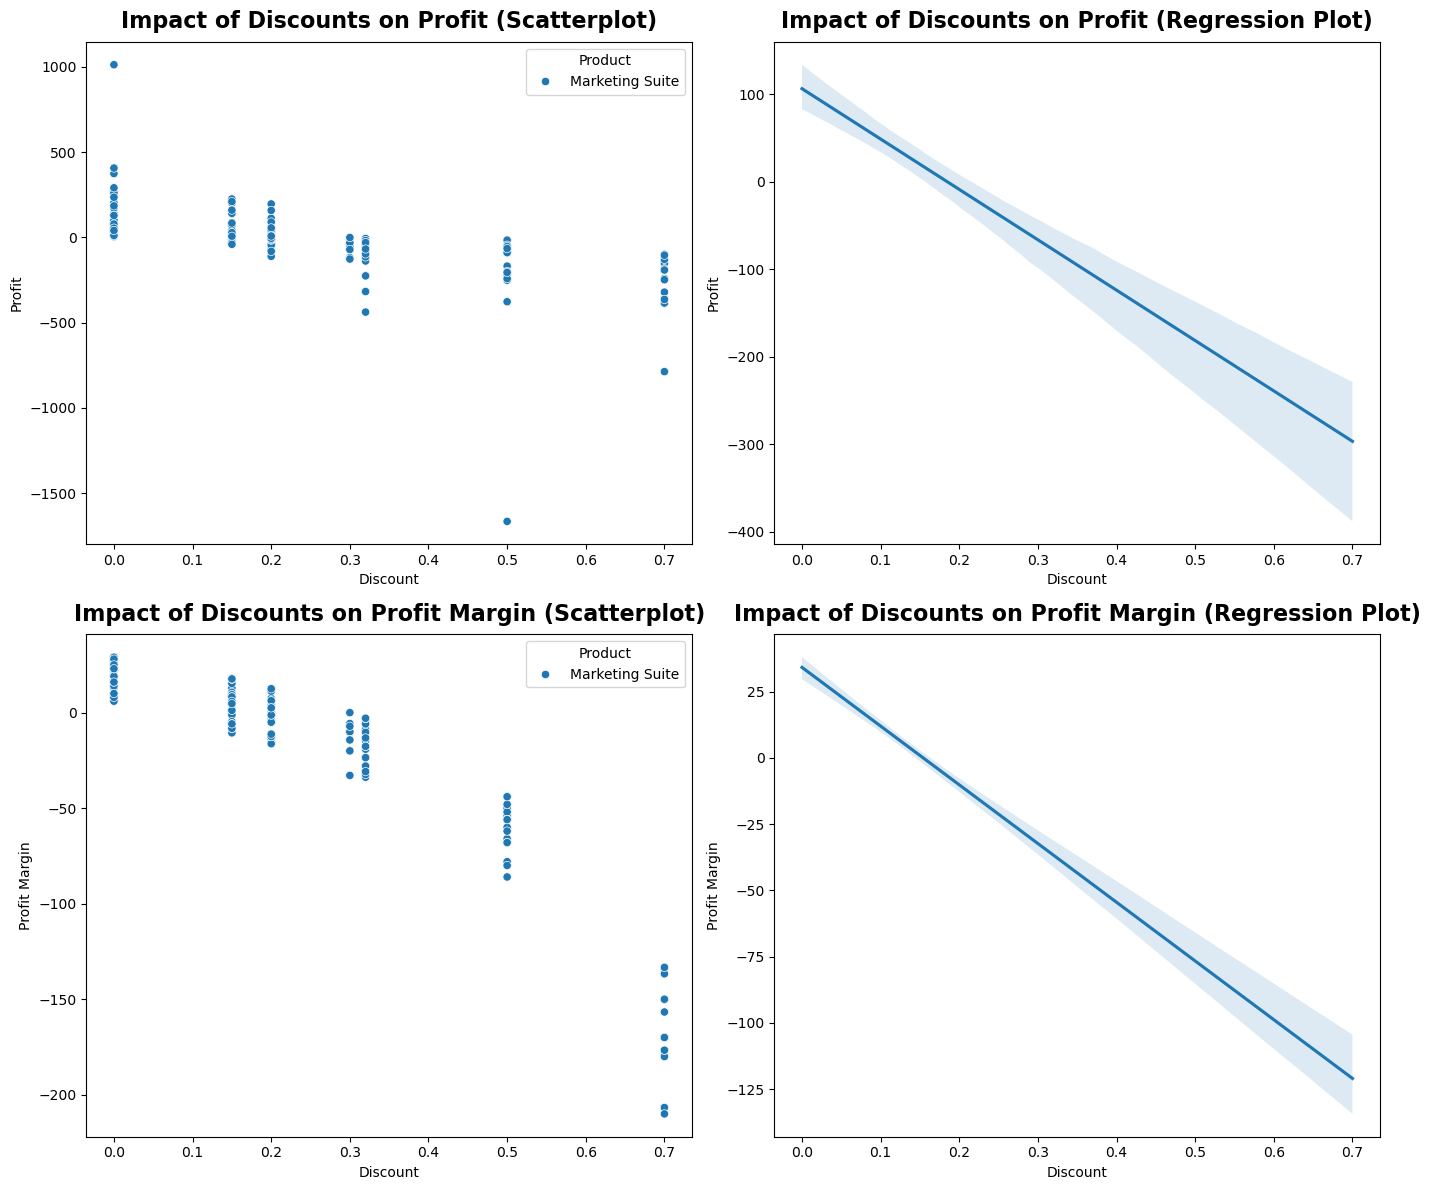

In [57]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Plotting scatterplot
sns.scatterplot(x='Discount', y='Profit', data=df_ms, hue='Product', ax=axes[0, 0])
axes[0, 0].set_title('Impact of Discounts on Profit (Scatterplot)', size=16, pad=10, fontweight='bold')
axes[0, 0].set_xlabel('Discount')
axes[0, 0].set_ylabel('Profit')
axes[0, 0].legend(title='Product')

# Plotting regression plot
sns.regplot(x='Discount', y='Profit', data=df_ms, scatter=False, ax=axes[0, 1])
axes[0, 1].set_title('Impact of Discounts on Profit (Regression Plot)', size=16, pad=10, fontweight='bold')
axes[0, 1].set_xlabel('Discount')
axes[0, 1].set_ylabel('Profit')

# Plotting scatterplot
sns.scatterplot(x='Discount', y='Profit Margin', data=df_ms, hue='Product', ax=axes[1, 0])
axes[1, 0].set_title('Impact of Discounts on Profit Margin (Scatterplot)', size=16, pad=10, fontweight='bold')
axes[1, 0].set_xlabel('Discount')
axes[1, 0].set_ylabel('Profit Margin')
axes[1, 0].legend(title='Product')

# Plotting regression plot
sns.regplot(x='Discount', y='Profit Margin', data=df_ms, scatter=False, ax=axes[1, 1])
axes[1, 1].set_title('Impact of Discounts on Profit Margin (Regression Plot)', size=16, pad=10, fontweight='bold')
axes[1, 1].set_xlabel('Discount')
axes[1, 1].set_ylabel('Profit Margin')

plt.tight_layout()
plt.show()

From the graphs above, it infers that there is a negative relationship between discount and profit as well as with profit margin. From the scatterplot and regression plot show that the higher the discount then the profit decreases. 

Afterwards, we want to check the correlation with spearman correlation.

**4.6.1 Correlation between Sales, Discount, Profit, Profit Margin and Quantity**

We use spearman correlation to calculate the relationship between numerical data that available in the data set, which include profit and discount, for non-parametric data.

,Sales,Discount,Profit,Profit Margin,Quantity
Sales,1.000000,-0.149500,0.233466,0.165776,0.617434
Discount,-0.149500,1.000000,-0.831739,-0.892099,0.144368
Profit,0.233466,-0.831739,1.000000,0.929936,-0.052914
Profit Margin,0.165776,-0.892099,0.929936,1.000000,-0.117881
Quantity,0.617434,0.144368,-0.052914,-0.117881,1.000000


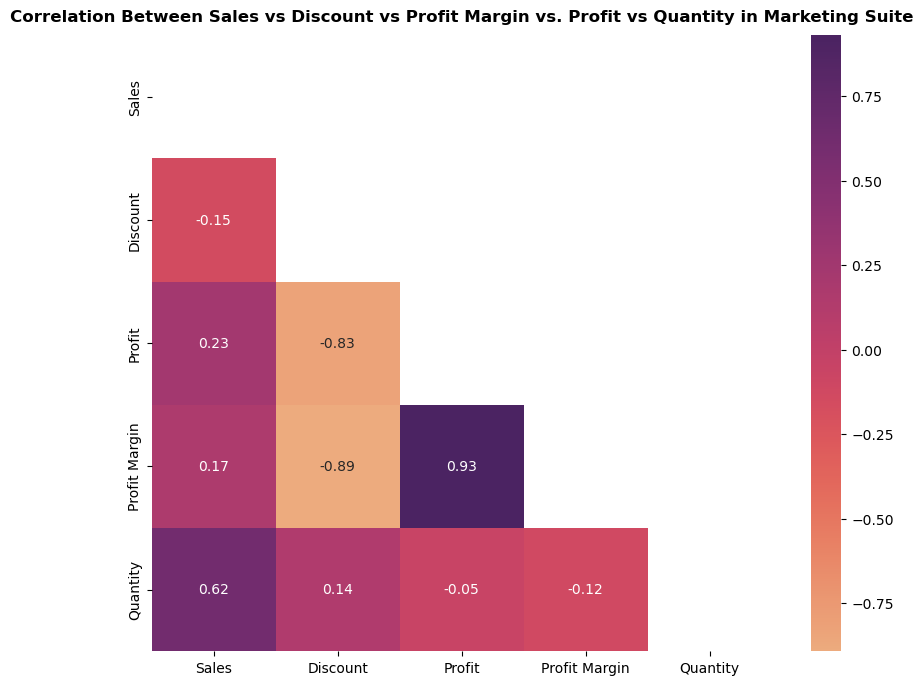

The correlation value between the Sales and Profit columns is 0.23
The relationship between the Sales and Profit variables is 'positive' with a correlation strength of 'weak'.

The correlation value between the Discount and Profit columns is -0.83
The relationship between the Discount and Profit variables is 'negative' with a correlation strength of 'very strong'.

The correlation value between the Profit and Profit columns is 1.00
The relationship between the Profit and Profit variables is 'positive' with a correlation strength of 'very strong'.

The correlation value between the Profit Margin and Profit columns is 0.93
The relationship between the Profit Margin and Profit variables is 'positive' with a correlation strength of 'very strong'.

The correlation value between the Quantity and Profit columns is -0.05
The relationship between the Quantity and Profit variables is 'negative' with a correlation strength of 'very weak'.



In [58]:
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin",'Quantity']
correlation = df_ms[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (10, 8))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "flare",
    center = 0,
    mask = matriks
)

plt.title("Correlation Between Sales vs Discount vs Profit Margin vs. Profit vs Quantity in Marketing Suite", size=12, pad=10, fontweight='bold')
plt.show()


for col in numerical_col:
    corr = df_ms[col].corr(df["Profit"], method="spearman")

    if corr > 0:
        correlation = "positive"
        if  corr > 0.0 and corr <= 0.2:
            strength = "very weak"
        elif corr > 0.2 and corr <= 0.4:
            strength = "weak"    
        elif corr > 0.4 and corr <= 0.6:
            strength = "moderate"
        elif corr > 0.6 and corr <= 0.8:
            strength = "strong"
        else:
            strength = "very strong"
    else:
        correlation = "negative"
        if corr  < 0.0 and corr >= -0.2:
            strength = "very weak"
        elif corr < -0.2 and corr >= -0.4:
            strength = "weak"    
        elif corr < -0.4 and corr >= -0.6:
            strength = "moderate"
        elif corr < -0.6 and corr >= -0.8:
            strength = "strong"
        else:
            strength = "very strong"

    print(f"The correlation value between the {col} and Profit columns is {corr:.2f}")
    print(f"The relationship between the {col} and Profit variables is '{correlation}' with a correlation strength of '{strength}'.")
    print()


**Key Insights:**
1. Profit and Profit Margin has a positive and very strong relationshiop, suggesting that the higher the Profit Margin then the Profit is higher.

2. Discount and Profit has a negative and very strong relationship, suggesting that the higher the disount then the Profit will decrease. This is also applied to Discount and Profit Margin relationship. 

3. Sales and Profit has a positive relationship, suggesting when the sales increase then the profit will also increase, however the correlation is weak. This also implies to Sales and Profit Margin relationship

4. Sales and discount has a weak negative relationship, suggesting when the sales decreases then at that time the discount is higher. 

5. Quantity has a weak relationship with Profit and Profit Margin, but strong relationship with Sales. This indicates that when the quantity increases then the salse increases too, but the profit and profit margin are lower.

# 5. Data analysis - Profit and Discount analyses based on Market Distribution, Segmentation and Customer Profiling

### **Geographical based analyses**

In [59]:
# Profit and discount by region

df_total_profitbyregion = df_ms.groupby("Region")[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_total_profitbyregion[['Sales','Profit']]= df_total_profitbyregion[['Sales','Profit']].map('${:,.2f}'.format)

df_total_profitbyregion_disc = df_ms.groupby('Region')['Discount'].median().reset_index()
df_total_profitbyregion_disc['Discount'] = (df_total_profitbyregion_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_total_profitbyregion_joint = pd.merge(df_total_profitbyregion,df_total_profitbyregion_disc)
df_total_profitbyregion_joint.head()



,Region,Sales,Profit,Discount
0,APJ,"$23,925.39","$-1,895.66",32.00%
1,EMEA,"$54,568.63","$-1,629.67",20.00%
2,AMER,"$36,385.98",$52.78,15.00%


In [60]:
df_plot_region = df_ms
fig = px.histogram(df_plot_region, x="Region", y="Profit",
             color='Region', barmode='relative',
             histfunc='sum', text_auto=True,
             height=500, width=600,
             labels={
                     "Region": "Regions",
                     })

fig.update_traces(textposition='auto',texttemplate="<b>%{y:$.2f}</b>")
fig.update_layout(
    title_text="Total Profit in Marketing Suit by Regions", title_x=0.5,
    barmode="relative",
    uniformtext=dict(mode="hide", minsize=10),
    xaxis={'categoryorder': 'total ascending'}
)
fig.show()

**Insight:**
1. AMER is the only region that profitable
2. APJ region has the biggest loss followed by EMEA


In [62]:
# Profit and discount by subregion

df_total_profitbysubregion = df_ms.groupby("Subregion")[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_total_profitbysubregion[['Sales','Profit']] = df_total_profitbysubregion[['Sales','Profit']].map('${:,.2f}'.format)

df_total_profitbysubregion_disc = df_ms.groupby('Subregion')['Discount'].median().reset_index()
df_total_profitbysubregion_disc['Discount'] = (df_total_profitbysubregion_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_total_profitbysubregion_joint = pd.merge(df_total_profitbysubregion,df_total_profitbysubregion_disc)
df_total_profitbysubregion_joint.head()



,Subregion,Sales,Profit,Discount
0,EU-WEST,"$9,777.49","$-3,257.87",20.00%
1,JAPN,"$14,493.46","$-2,391.14",32.00%
2,EU-EAST,"$2,618.08","$-2,184.33",70.00%
3,LATAM,"$5,683.00","$-1,936.22",50.00%
4,ANZ,"$4,282.70",$-555.87,30.00%


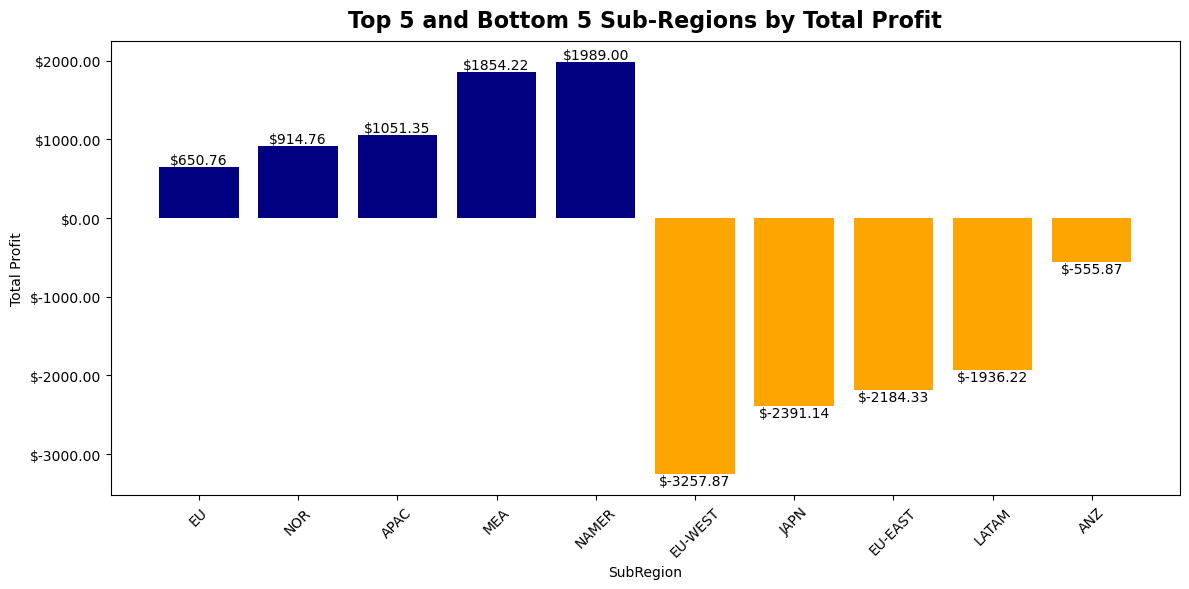

In [77]:
# Splitting into top 5 and bottom 

df_graphsubregion = df_ms.groupby('Subregion')['Profit'].sum().sort_values(ascending=True)
top_5 = df_graphsubregion.tail(5)
bottom_5 = df_graphsubregion.head(5)

# Combining top and bottom 5 for plotting
combined_data = pd.concat([top_5, bottom_5])

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(12, 6))

# Custom colors for bars
colors = ['navy'] * 5 + ['orange'] * 5  

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combined_data.items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position to center the annotation
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 Sub-Regions by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('SubRegion')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

**Insights:**
1. Marketing Suite has a pronounce negative profit at the EU-WEST, JAPN, EU-EAST, LATAM and ANZ. The range of median discount given here was between 20-70%. This may suggest that Marketing Suite product was struggling in these subregions. 

2. In contrast, Marketing Suite performed well at the NAMER, MEA, APAC, NOR, and EU. The range of median discount given here was between 0 - 15%.

In [ ]:
# profit and discount by country
df_total_profitbycountry = df_ms.groupby("Country")[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_total_profitbycountry[['Sales','Profit']] = df_total_profitbycountry[['Sales','Profit']].map('${:,.2f}'.format)

df_total_profitbycountry_disc = df_ms.groupby('Country')['Discount'].median().reset_index()
df_total_profitbycountry_disc['Discount'] = (df_total_profitbycountry_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_total_profitbycountry_joint = pd.merge(df_total_profitbycountry,df_total_profitbycountry_disc)
df_total_profitbycountry_joint.head(35)

,Country,Sales,Profit,Discount
0,France,"$5,230.76","$-2,896.76",50.00%
1,Russia,"$1,583.52","$-2,408.92",70.00%
2,Japan,"$14,493.46","$-2,391.14",32.00%
3,Mexico,"$2,077.70","$-1,359.05",50.00%
4,Chile,$519.21,$-869.21,70.00%
5,Belgium,$356.65,$-616.82,70.00%
6,Australia,"$4,282.70",$-555.87,30.00%
7,Germany,"$2,587.06",$-116.07,20.00%
8,Sweden,$959.06,$-97.98,20.00%
9,South Africa,$518.24,$-6.32,20.00%


**Insights:**

1. The top 5 profitable countries are Canada, Italy, Finland, Egypt and United States

2. The bottom 5 unprofitable countries are France, Russia, Japan, Mexico and Chile

In [ ]:
# Profit and discount by city
df_total_profitbycity = df_ms.groupby("City")[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_total_profitbycity[['Sales','Profit']] = df_total_profitbycity[['Sales','Profit']].map('${:,.2f}'.format)

df_total_profitbycity_disc = df_ms.groupby('City')['Discount'].median().reset_index()
df_total_profitbycity_disc['Discount'] = (df_total_profitbycity_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_total_profitbycity_joint = pd.merge(df_total_profitbycity,df_total_profitbycity_disc)

display(df_total_profitbycity_joint.head(), df_total_profitbycity_joint.tail())


,City,Sales,Profit,Discount
0,Paris,"$4,531.34","$-2,568.14",50.00%
1,St Petersburg,$895.39,"$-1,331.32",70.00%
2,Tokyo,"$8,742.78","$-1,120.42",32.00%
3,Mexico City,"$1,360.30",$-884.95,50.00%
4,Moscow,$405.53,$-653.18,70.00%


,City,Sales,Profit,Discount
95,Helsinki,"$1,983.72",$463.35,0.00%
96,New York City,"$10,154.86",$499.72,15.00%
97,Toronto,"$3,144.46",$570.01,0.00%
98,Los Angeles,"$9,790.71",$669.98,15.00%
99,Cairo,"$4,404.90","$1,013.13",0.00%


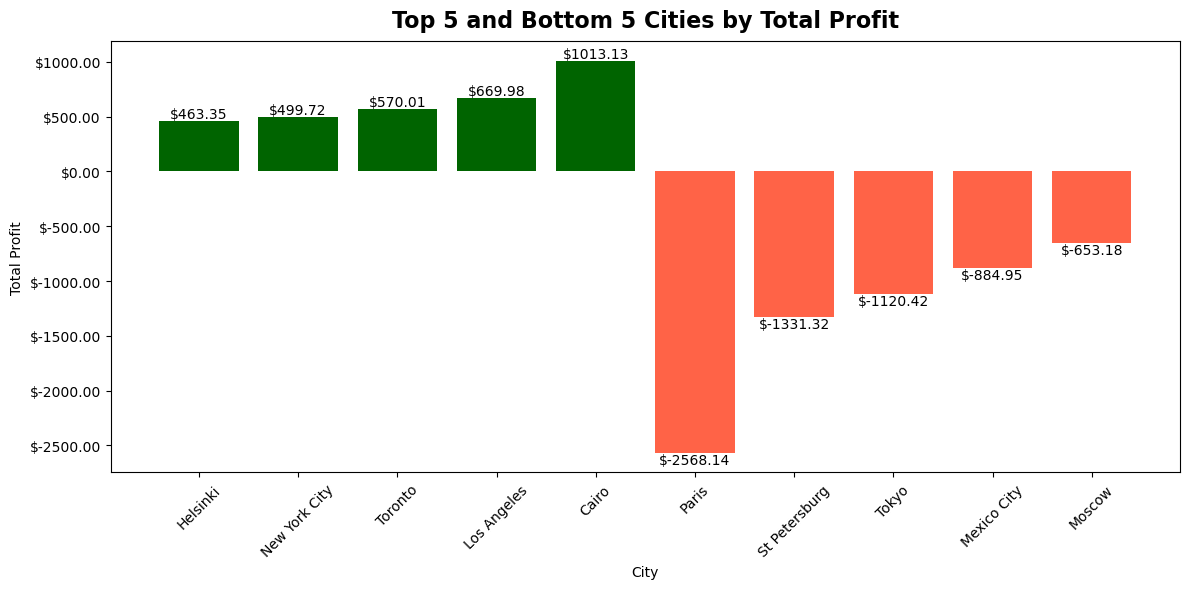

In [84]:
# Splitting into top 5 and bottom 

df_graphcity = df_ms.groupby('City')['Profit'].sum().sort_values(ascending=True)
top_5 = df_graphcity.tail(5)
bottom_5 = df_graphcity.head(5)

# Combining top and bottom 5 for plotting
combined_datacity = pd.concat([top_5, bottom_5])

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(12, 6))

# Custom colors for bars
colors = ['darkgreen'] * 5 + ['tomato'] * 5  

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combined_datacity.items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position to center the annotation
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 Cities by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

**Insights:**
As expected, the top 5 and bottom 5 profit by cities are derived from the top 5 and bottom 5 profit by countries. 

1. The top 5 unprofitable cities are Paris followed by St Petersburg, Tokyo, Mexico City and Moscow.

2. The top 5 profitable cities are Cairo followed by Los Angeles, Toronto, New York City and Helsinki.

### **Business segmentation and Industry type**

In [52]:
# Sales , Profit, Discount in Business Segmentation
df_business_segmentation = df_ms.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Segment').reset_index()
df_business_segmentation [['Sales','Profit']] = df_business_segmentation[['Sales','Profit']].map('${:,.2f}'.format)

df_business_segmentation_quan = df_ms.groupby('Segment')['Quantity'].sum().reset_index()
df_business_segmentation_quan ['Quantity'] = df_business_segmentation_quan['Quantity'].map('{:,.1f}'.format)

df_business_segmentation_disc = df_ms.groupby('Segment')['Discount'].median().reset_index()
df_business_segmentation_disc['Discount'] = (df_business_segmentation_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_business_segmentation_joint = pd.concat([df_business_segmentation,df_business_segmentation_quan,df_business_segmentation_disc], axis=1)
df_business_segmentation_joint

,Segment,Sales,Profit,Segment,Quantity,Segment,Discount
0,Enterprise,"$12,241.34",$324.63,Enterprise,101.0,Enterprise,15.00%
1,SMB,"$68,632.73","$-4,435.64",SMB,496.0,SMB,20.00%
2,Strategic,"$34,005.92",$638.45,Strategic,271.0,Strategic,17.50%


In [53]:
df_industry_segmentation_count = df_ms.groupby('Segment').count().reset_index()
df_industry_segmentation_count

,Segment,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Neg_profit,Order Month,Order Year
0,Enterprise,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,SMB,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,Strategic,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [259]:
proportion_segment = df_ms['Segment'].value_counts()/len(df_ms)*100
proportion_segment

Segment
SMB           57.456140
Strategic     28.070175
Enterprise    14.473684
Name: count, dtype: float64

In [278]:
import plotly.graph_objects as go

figsegment = go.Figure(data=[go.Pie(
    labels=proportion_segment.index,  
    values=proportion_segment.values,  
    hole=0.4,
    hoverinfo='label+percent+value',
    textinfo='percent+label'
)])

figsegment.update_traces(textposition='auto')
figsegment.update_layout(
    title_text="Segment Proportion (%)", title_x=0.5,
    showlegend=False
)

figsegment.show()

#### Hypothesis testing of the profit based on the segment

H0 = no profit difference between "SMB, Strategic, Enterprise" ; 
H1 = there is a difference between "SMB, Strategic, Entreprise" 

Type of stats : 
more than 2 variables in a non parametric data = Kruskal Wallis

In [283]:
from scipy.stats import kruskal


# Group the Profit data by Segment for Marketing Suite only
profit_smb_ms = df_ms[df_ms['Segment'] == 'SMB']['Profit']
profit_strategic_ms = df_ms[df_ms['Segment'] == 'Strategic']['Profit']
profit_enterprise_ms = df_ms[df_ms['Segment'] == 'Enterprise']['Profit']

# Perform the Kruskal-Wallis H-test
statistic_ms, p_value_ms = kruskal(profit_smb_ms, profit_strategic_ms, profit_enterprise_ms)
statistic_ms, p_value_ms

print(f"Kruskal-Wallis Test:\nH-statistic: {statistic_ms}\nP-value: {p_value_ms}")

Kruskal-Wallis Test:
H-statistic: 3.4601394644340844
P-value: 0.17727204796594356


The p-value : 0.177 , which is greater than 0.05, suggesting that there is no difference of median profit between segments (SMB, Strategic, Entreprise)

**Insights:**

1. Based on the business segmentation, Marketing suite's is highly bought SMB segment (n = 131, 57.5%), followed by Strategic (n=64, 28.1% ) and Entreprise (n=33, 14.5%) segments. This rank also appears on the Sales quantity.
2. Though, SMB segment is the majority of customer, the total profit is negative with median discount 20% (which is the highest), compared to Strategic and Entreprise
3. Then, we try to check with Kruskall Wallis comparison testing if there is any profit difference between segments. However, the result suggests that there is no difference of median profit between segments. This implies that in all segments are facing the similar situation. 

In [ ]:
# Profit and Discount by Industry
df_industry_segmentation = df_ms.groupby('Industry')[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_industry_segmentation[['Sales','Profit']]= df_industry_segmentation[['Sales','Profit']].map('${:,.2f}'.format)

df_industry_segmentation_disc = df_ms.groupby('Industry')['Discount'].median().reset_index()
df_industry_segmentation_disc['Discount'] = (df_industry_segmentation_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_industry_segmentation_joint = pd.merge(df_industry_segmentation,df_industry_segmentation_disc)
df_industry_segmentation_joint

,Industry,Sales,Profit,Discount
0,Finance,"$22,316.02","$-1,775.80",20.00%
1,Transportation,"$6,214.49",$-984.50,26.00%
2,Tech,"$22,592.51",$-866.59,20.00%
3,Communications,"$3,390.97",$-451.54,17.50%
4,Consumer Products,"$13,662.36",$-122.36,20.00%
5,Misc,$909.35,$53.54,0.00%
6,Energy,"$16,754.62",$53.77,15.00%
7,Healthcare,"$11,563.27",$72.94,15.00%
8,Retail,"$6,618.21",$177.98,15.00%
9,Manufacturing,"$10,858.19",$369.99,15.00%


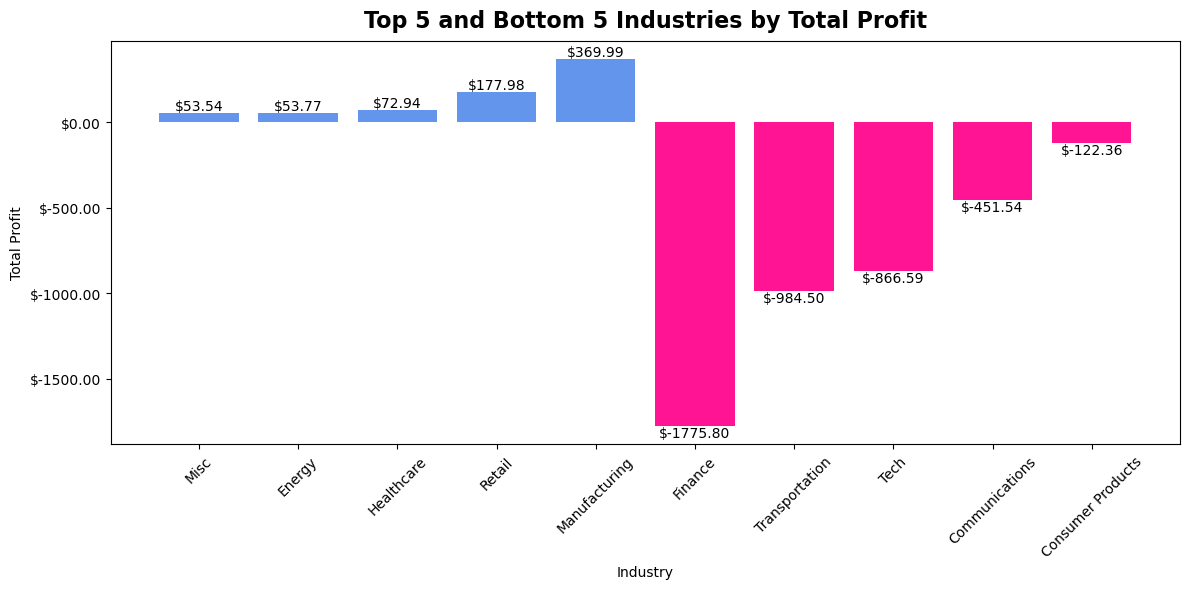

In [86]:
# Splitting into top 5 and bottom 

df_graphindustry = df_ms.groupby('Industry')['Profit'].sum().sort_values(ascending=True)
top_5 = df_graphindustry.tail(5)
bottom_5 = df_graphindustry.head(5)

# Combining top and bottom 5 for plotting
combined_dataindustry = pd.concat([top_5, bottom_5])

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(12, 6))

# Custom colors for bars
colors = ['cornflowerblue'] * 5 + ['deeppink'] * 5  

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combined_dataindustry.items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position to center the annotation
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 Industries by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

In [214]:
# Profit and Discount by Country, Segment,and Industry
df_industry_segmentation = df_ms.groupby(['Country','Industry','Segment'])[['Sales','Quantity','Profit']].sum().sort_values(by='Country').reset_index()
df_industry_segmentation[['Sales','Quantity','Profit']]= df_industry_segmentation[['Sales','Quantity','Profit']]

df_industry_segmentation_disc = df_ms.groupby(['Country','Industry','Segment'])['Discount'].median().reset_index()
df_industry_segmentation_disc['Discount'] = (df_industry_segmentation_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_industry_segmentation_joint = pd.merge(df_industry_segmentation,df_industry_segmentation_disc)
df_industry_segmentation_joint.head(10)

,Country,Industry,Segment,Sales,Quantity,Profit,Discount
0,Argentina,Consumer Products,SMB,120.980,1,12.0980,0.00%
1,Argentina,Transportation,SMB,2154.900,5,129.2940,0.00%
2,Australia,Energy,SMB,359.058,3,-71.8116,30.00%
3,Australia,Energy,Strategic,825.174,9,-117.8820,30.00%
4,Australia,Finance,SMB,676.802,7,-107.1644,30.00%
5,Australia,Finance,Strategic,141.372,2,-14.1372,30.00%
6,Australia,Retail,SMB,622.860,10,-30.2940,30.00%
7,Australia,Tech,Enterprise,359.058,3,-35.9058,30.00%
8,Australia,Tech,SMB,1298.374,9,-178.6776,30.00%
9,Belgium,Tech,SMB,217.764,6,-384.7164,70.00%


**Insights:**

1. After we found that there is no median profit difference between segments, then we continue to analyse and look deeper again based on the industry and combine the data coloumn listed for each country-industry-segment. 
2. The unprofitable industries was found in Finance, Transportation, Tech, Communication and Consumer Products; while the rests are profitable. 
3. In a wider dataframe (Profit and Discount by Country, Segment,and Industry), it appeares that countries implementing higher discount, such as Australia, France, Chile, Japan, become highly unprofitable and this affecting all business segments as expected. 

Thus, we want to understand more about the difference between discount and profit

### Hypothesis testing of profit based on discount

H0 = there is no difference of median profit between low, medium and high discount groups ; 

H1 = there is a difference of median profit between low, medium and high discount groups

Type of stats : Kruskall-Wallis ; alpha : 0.05

In [284]:
# Get the discount threshold
Q1_discount_thres = df_ms['Discount'].quantile(0.25)
median_discount = df_ms["Discount"].quantile(0.5)
Q3_discount_thres = df_ms['Discount'].quantile(0.75)

# Split the data
low_discount = df_ms[df_ms["Discount"] <= median_discount]["Profit"]
medium_discount = df_ms[df_ms["Discount"].between (median_discount,Q3_discount_thres)]["Profit"]
high_discount = df_ms[df_ms["Discount"] > Q3_discount_thres]["Profit"]

#kruskall
statistic_disc_ms, p_value_disc_ms = kruskal(low_discount, medium_discount, high_discount)
statistic_disc_ms, p_value_disc_ms

print(f"Low discount: {Q1_discount_thres:.2f}")
print(f"Medium discount: {median_discount:.2f}")
print(f"High discount: {Q3_discount_thres:.2f}")
print(f"Kruskal-statistic: {statistic_disc_ms}")
print(f"P-value: {p_value_disc_ms}")

Low discount: 0.00
Medium discount: 0.20
High discount: 0.32
Kruskal-statistic: 123.767880425156
P-value: 1.3309025195968688e-27


**The p-value is 1.33e-27 which is < 0.05. This suggest that there is a significant difference between median profit in low discount, medium discount and high discount categories**

##### Indentify the suitable discount for a positive profit (+) or at least closer to the break even point (0) profit :

To understand better about the relationship between discount and profit, we created a scatter plot based on discount and profit from general overview as a regions, and deeper investigation at the country level. In the scatterplot, we add a (x) line separation indicating a border of between positive and negative sales, and two (y) lines placed at 0.2 and 0.32 discounts to identify groups with low, median, and high discounts.

Text(0.5, 1.0, 'Discount vs Profit between Regions')

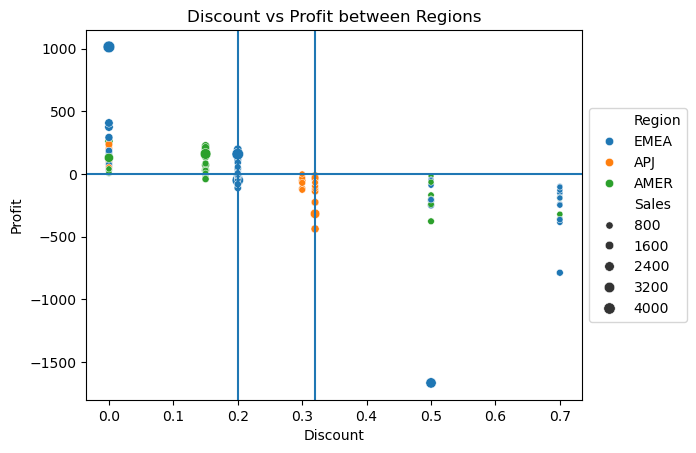

In [98]:
Region_sp = sns.scatterplot(x='Discount', y='Profit', data=df_ms, hue='Region', size='Sales')
Region_sp.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
Region_sp.axhline(y=0)
Region_sp.axvline(x=0.2)
Region_sp.axvline(x=0.32)
Region_sp.set_title('Discount vs Profit between Regions')


From the discount vs profit between regions scatterplot, illustrates that many negative profits are detected for APJ, EMEA, and little bit of AMER. The border at 0.2 results in a positive and negative value, while after 0.2 the profit tends to be negative. Also, the company gives very high discount in a very small sales which burdening the profit itself.

Text(0.5, 1.0, 'Discount vs Profit in top 10 Profitable Countries')

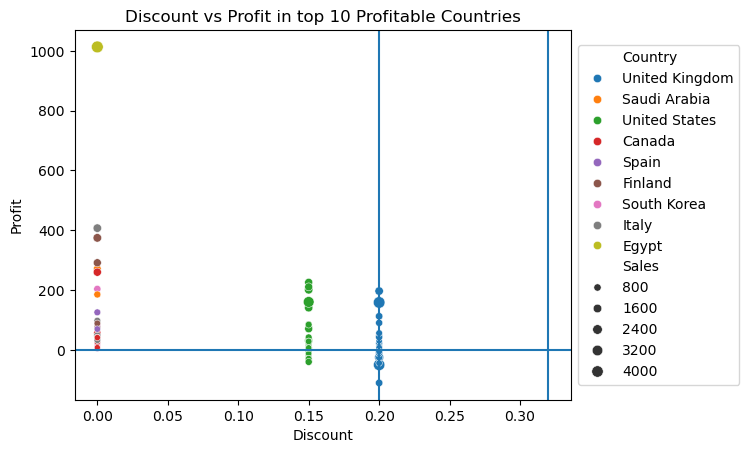

In [103]:
df_ms_subregion_2 = df_ms[df_ms['Country'].isin(['United States','Egypt','Finland','Italy','Canada','Phillipines','Saudi Arabia','South Korea','United Kingdom','Spain'])]

Subregion_sp2 = sns.scatterplot(x='Discount', y='Profit', data=df_ms_subregion_2, hue='Country', size='Sales')
Subregion_sp2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
Subregion_sp2.axhline(y=0)
Subregion_sp2.axvline(x=0.2)
Subregion_sp2.axvline(x=0.32)
Subregion_sp2.set_title('Discount vs Profit in top 10 Profitable Countries')

In the top 10 profitable countries, at a discount of 0.15 and 0.2 , we found a positive and negative profits. This may suggest that at this two point could be the optimum discounts given to the customer. However, we also need to calculate other factors such as profit margin and sales quantity /revenue.

Text(0.5, 1.0, 'Discount vs Profit in Unprofitable Countries')

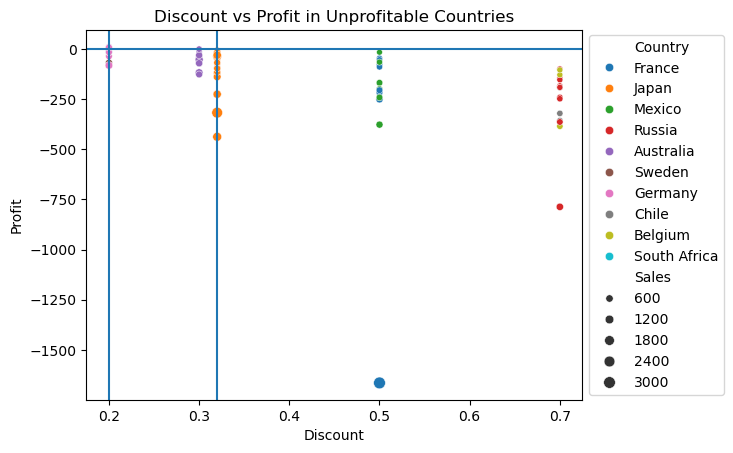

In [99]:
df_ms_subregion = df_ms[df_ms['Country'].isin(['France','Russia','Japan','Mexico','Chile','Belgium','Australia','Germany','Sweden','South Africa'])]

Subregion_sp = sns.scatterplot(x='Discount', y='Profit', data=df_ms_subregion, hue='Country', size='Sales')
Subregion_sp.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
Subregion_sp.axhline(y=0)
Subregion_sp.axvline(x=0.2)
Subregion_sp.axvline(x=0.32)
Subregion_sp.set_title('Discount vs Profit in Unprofitable Countries')

In the unprofitable countries, the pattern is similar where at >= 0.2 discount the profit turns into negative. 

**From the scatterplots above, we hypothesis that an optimum discount is between 0.15 - 0.2 (15%-20%), and discount greater than a 20% is potentially resulting in a negative value. Of note, we also have to consider other factors to such as sales quantity + revenue and profit margin.**

# Profit by Customer

Further analyses was performed to understand more about the profit from the customer factors. 

In [199]:
# Sales and Profit by customer
df_profit_customer = df_ms.groupby(['Segment','Customer'])[['Sales','Profit']].sum().sort_values(by='Profit').reset_index()
df_profit_customer[['Sales','Profit']]= df_profit_customer[['Sales','Profit']]

df_profit_customer_disc = df_ms.groupby(['Segment','Customer'])['Discount'].median().reset_index()
df_profit_customer_disc['Discount'] = (df_profit_customer_disc['Discount']*100).apply(lambda x: f"{x:.2f}%")

df_profit_customer_merge = pd.merge(df_profit_customer,df_profit_customer_disc)
display(df_profit_customer_merge.head(10), df_profit_customer_merge.tail(10))


,Segment,Customer,Sales,Profit,Discount
0,SMB,Intel,4256.8980,-1597.0560,20.00%
1,SMB,Nissan Motor,2242.4306,-1392.2704,50.00%
2,Strategic,Banco Santander,681.2120,-408.9124,35.00%
3,Strategic,Phillips 66,826.9770,-393.2583,42.50%
4,SMB,Cisco Systems,217.7640,-384.7164,70.00%
5,Strategic,Bosch,242.3520,-363.5280,70.00%
6,SMB,McKesson,1233.8850,-327.4683,35.00%
7,Strategic,BNP Paribas,1958.8528,-323.6472,26.00%
8,SMB,Pemex,181.4700,-320.5970,70.00%
9,SMB,HSBC Holdings,578.1885,-313.8780,50.00%


,Segment,Customer,Sales,Profit,Discount
128,SMB,Sysco,1937.524,176.9956,0.00%
129,Strategic,AmerisourceBergen,638.820,185.2578,0.00%
130,Strategic,Marathon Petroleum,1552.831,200.9546,15.00%
131,SMB,United Parcel Service,1279.165,225.7350,15.00%
132,Strategic,Royal Dutch Shell,1025.880,235.9524,0.00%
133,Strategic,Amazon,1043.920,271.4192,0.00%
134,SMB,Tesco,1266.860,291.3778,0.00%
135,SMB,Apple,1943.172,358.9110,10.00%
136,Strategic,Exxon Mobil,2122.545,413.6778,7.50%
137,Strategic,Samsung Electronics,4404.900,1013.1270,0.00%


**The customers who have negative profits generally received a discount which is higher than the median discount.**

In [106]:
df_profit_customer2 = df_ms.groupby(['Segment','Customer'])['Profit'].sum().sort_values(ascending=True).reset_index()

top_3 = df_profit_customer2.groupby('Segment').apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)
# Plotly stacked bar chart
fig = px.bar(
    top_3,
    x='Segment',
    y='Profit',
    color='Customer',
    title='Top 3 Customers by Profit per Segment (Stacked)',
    labels={'Profit': 'Total Profit'},
    width=600,
    height=700
)

fig.update_layout(barmode='relative', xaxis={'categoryorder': 'total ascending'})
fig.show()

/var/folders/ll/nc809zrd2px5sbz990z2ln4h0000gn/T/ipykernel_938/117752359.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Top 3 customers by Profit per segment : 
1. Entreprise : Mitshubisi, Toyota Motor, HonHai
2. SMB : United Parcel Service, Tesco, Apple
3. Strategic: Amazon, Samsung mobile, Samsung electronics

In [107]:
df_profit_customer2 = df_ms.groupby(['Segment','Customer'])['Profit'].sum().sort_values(ascending=True).reset_index()

bottom_3 = df_profit_customer2.groupby('Segment').apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)
# Plotly stacked bar chart
fig = px.bar(
    bottom_3,
    x='Segment',
    y='Profit',
    color='Customer',
    title='Bottom 3 Customers by Profit per Segment (Stacked)',
    labels={'Profit': 'Total Profit'},
    width=600,
    height=700
)

fig.update_layout(barmode='relative', xaxis={'categoryorder': 'total ascending'})
fig.show()

/var/folders/ll/nc809zrd2px5sbz990z2ln4h0000gn/T/ipykernel_938/2600570570.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Bottom 3 customers by Profit per segment : 
1. Entreprise : News Crop, Sony, Fannie Mae
2. SMB : Cisco Systems, Nissan Motor, Intel
3. Strategic: Bosch, Phillips66, Banco Santander

As an additional analyses, we want to understand about high and low value customers for a better sales prospect and maintenance. **Here, we use RFM - Recency, Frequency and Monetary scoring to identify the high and low value customer that previously bought Marketing Suite.**

1. Recency: How recently the customer made a purchase
2. Frequency: how often the customer makes purchases
3. Monetary: how much money (total amount) was spent to buy the products

In [152]:
df_custrecency = df_ms.groupby(by='Customer', as_index=False)['Order Date'].max()
df_custrecency.columns = ['Customer', 'LastPurchaseDate']
recent_date = df_custrecency['LastPurchaseDate'].max()
df_custrecency['Recency'] = df_custrecency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_custrecency = df_custrecency.sort_values(by='Recency', ascending=True).reset_index(drop=True)

display(df_custrecency.head(), df_custrecency.tail())

,Customer,LastPurchaseDate,Recency
0,Morgan Stanley,2023-12-31,0
1,Mondelez International,2023-12-29,2
2,Microsoft,2023-12-26,5
3,UnitedHealth Group,2023-12-23,8
4,Johnson & Johnson,2023-12-20,11


,Customer,LastPurchaseDate,Recency
84,McKesson,2020-12-02,1124
85,FedEx,2020-06-14,1295
86,General Electric,2020-03-30,1371
87,Home Depot,2020-03-18,1383
88,Anthem,2020-03-03,1398


In [139]:
custfrequency_df = (
    df_ms[['Customer', 'Order ID']]
    .drop_duplicates()
    .groupby('Customer', as_index=False)
    .count()
    .rename(columns={'Order ID': 'Frequency'})
    .sort_values(by='Frequency', ascending=True)
    .reset_index(drop=True) 
)

display(custfrequency_df.head(), custfrequency_df.tail())

,Customer,Frequency
0,HonHai Precision Industry,1
1,Engie,1
2,Coca-Cola,1
3,Citigroup,1
4,Cisco Systems,1


,Customer,Frequency
84,Tyson Foods,5
85,Siemens,6
86,Allianz,6
87,BNP Paribas,7
88,Wells Fargo,7


In [145]:
monetary_df = df_ms.groupby(by='Customer', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
monetary_df.columns = ['Customer', 'Monetary']
display(monetary_df.head(), monetary_df.tail())

,Customer,Monetary
43,Humana,6360.388
44,Intel,4856.063
79,Tyson Foods,4700.512
49,Lukoil,4540.466
69,Samsung Electronics,4404.900


,Customer,Monetary
45,Itochu,136.7840
46,J.P. Morgan Chase & Co.,134.2872
21,China National Petroleum,120.6660
23,Citigroup,89.9910
27,Costco Wholesale,81.9400


In [193]:
rf_df = df_custrecency.merge(custfrequency_df, on='Customer')
rfm_df = rf_df.merge(monetary_df, on='Customer').drop(
    columns='LastPurchaseDate')

rfm_df.head()

,Customer,Recency,Frequency,Monetary
0,Morgan Stanley,0,3,738.6640
1,Mondelez International,2,2,387.3518
2,Microsoft,5,2,261.5600
3,UnitedHealth Group,8,5,2103.6820
4,Johnson & Johnson,11,4,700.0440


In [195]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head(10)

,Customer,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Morgan Stanley,0,3,738.6640,100.000000,68.926554,68.539326
1,Mondelez International,2,2,387.3518,98.876404,44.067797,43.820225
2,Microsoft,5,2,261.5600,97.752809,44.067797,43.820225
3,UnitedHealth Group,8,5,2103.6820,96.629213,93.220339,92.696629
4,Johnson & Johnson,11,4,700.0440,95.505618,85.310734,84.831461
5,Sony,12,5,2644.2368,94.382022,93.220339,92.696629
6,Mitsubishi,17,5,1988.2670,93.258427,93.220339,92.696629
7,Volkswagen,21,3,770.3040,92.134831,68.926554,68.539326
8,Amazon,22,4,3398.0800,91.011236,85.310734,84.831461
9,Bosch,28,1,242.3520,89.887640,15.819209,15.730337


In [200]:
#RFM score's scale up to 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)  #rescalling
rfm_df[['Customer', 'RFM_Score']].head()

,Customer,RFM_Score
0,Morgan Stanley,3.67
1,Mondelez International,2.61
2,Microsoft,2.60
3,UnitedHealth Group,4.67
4,Johnson & Johnson,4.33


In [183]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers", 
                            (np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
                            (np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))

rfm_df = rfm_df.sort_values(by='RFM_Score', ascending=False).reset_index(drop=True)

display(rfm_df[['Customer', 'RFM_Score', 'Customer_segment']].head(10),rfm_df[['Customer', 'RFM_Score', 'Customer_segment']].tail(10))

,Customer,RFM_Score,Customer_segment
0,Wells Fargo,4.75,Top Customers
1,BNP Paribas,4.68,Top Customers
2,UnitedHealth Group,4.67,Top Customers
3,Sony,4.65,Top Customers
4,Mitsubishi,4.65,Top Customers
5,Allianz,4.64,Top Customers
6,Tyson Foods,4.57,Top Customers
7,Intel,4.56,Top Customers
8,Valero Energy,4.48,High value Customer
9,Siemens,4.45,High value Customer


,Customer,RFM_Score,Customer_segment
79,Samsung Electronics,0.78,Lost Customers
80,HonHai Precision Industry,0.77,Lost Customers
81,Enel,0.75,Lost Customers
82,Fannie Mae,0.74,Lost Customers
83,Safeway,0.73,Lost Customers
84,Walt Disney,0.72,Lost Customers
85,General Electric,0.70,Lost Customers
86,FedEx,0.70,Lost Customers
87,Home Depot,0.69,Lost Customers
88,Anthem,0.68,Lost Customers


**Insights:**
1. Based on the scoring that uses Total Sales (not profit), the Top customers of Marketing suite is Wells Fargo, BNP Paribas, UnitedHealth Group, Sony, Mitsubishi, Allianz, Tyson Foods and Intel. However, Sony and Intel was identified previously that both companies contributes to a pronounce loss at Entreprise and SMB segment, respectively. This may suggest that we need to find another way to maintain the top customer without regularly giving too much discount 

2. Although Samsung electronincs and HonHai Precision Industry had previously named in Top 3 customers by segment, they fall in the lost customer category. It suggest that these high profit incomes are not sustain and further evaluation is needed to prevent lacked of customer engagement in marketing suite. 

# Key summaries:

1. From 2020-2023, negative profit was identified for the Marketing Suite product ($-3473), with a median profit margin of $1.18

2. There is a very strong negative relationship between discount and profit as well as profit margin, suggesting the higher the discount, the smaller the profit. This challenge requires strategy and re-assessment. 

3. Based on the geographical distribution, Marketing Suite struggles in the EMEA and APJ regions, as well as at the country and city levels. Meanwhile, it performs well in the AMER region and its subordinates. 

4. SMB has the highest proportion of business segments; however, the total profit has turned negative. Also, there is no median profit difference between SMB, Strategic, and Enterprise, suggesting that discount impacts are similar to those of the three segments.

5. A significant difference exists between median profit for low, medium, and high discounts. Moreover, we hypothesize that to get a positive discount or at least BEP, the optimum discount should be between 15-20%, and a discount greater than 20% could result in negative profit. 

6. The company has been suspected of giving a higher discount to top customers to maintain engagement. 

# Conclusion 

The Marketing Suite product has a negative profitability, which is correlated with an excessive discount. This finding is identified primarily in the EMEA and APJ regions, particularly countries like France, Russia, Japan, Mexico, and Chile, as well as across business segments and industries. 

Thus, there is a need for immediate action and strategy to prevent further loss.


## Recommendation

**1. Implement Discount Optimization and Governance**
* It is suggested that a discount cap of 15–20% should be set for the regions and countries with negative profits, including the customer segments.
* If the country representatives want to give a discount of>20%, they have to implement a centralized discount approval from the headquarters. This procedure is created to ensure oversight and reduce high discrepancy in discounting. 
* The company can create a tiered discounting model based on the RFM score, ensuring the top consumers receive competitive and stable pricing without causing financial harm to the company. 

**2. Regional and city sales strategy reassessment**
* Perform in-depth market analysis for underperforming countries (e.g., France, Japan, Russia) to evaluate the local challenges (eg. Competitor, customer pricing expectations, and whether the product fits the business operation.
* Research alternative pricing and bundling package strategies instead of relying on discount
Empower country representatives with a localized marketing approach.

**3. Evaluating SMB segments**
* Considering segmenting SMB customers for differentiating pricing and engagement strategy, e.g., small business owner vs start-up 
* Upselling strategy after the customer used AWS products
* Implement a subscription plan-based model. 

**4. Review Customer category using RFM vs discounting** 
* Audit the top and high-value customers' discount program and evaluate whether a discount improves retention and frequency of purchase. 
* Alter broad/high discounting patterns to a loyalty-based discounting strategy and evaluate the sales.

**5. Revamping Marketing suite value of sales**
* Provide training to the sales team and use different angles for marketing. 
* By leveraging customer success stories from the AMER region, sellers can sell the product using value-based technology and show the superiority of this product and how it significantly increases the sales traffic of the business.